## Final Project Submission

Please fill out:
* Student name: Levi Raichik 
* Student pace: full time
* Scheduled project review date/time: June 4, 2 PM
* Instructor name: Rafael Carrasco
* Blog post URL: https://medium.com/@lraichik/analyzing-king-county-seattle-housing-data-ba3132a76933?source=friends_link&sk=b1d7d504debc8c3d2cd6b3ead1c5950d


# Table of contents

* [Introduction](#Introduction)
* [Import](#Import-everything-I-may-need)
* [Load data and check it out](#Load-the-data)
* [Data Cleaning](#Data-Cleaning)
* [Examining the Data](#Examining-the-data)
    * [Q1: Does the amount of views of a home before it is sold show anything about the final sale price?](#Q1:-Does-the-amount-of-views-of-a-home-before-it-is-sold-show-anything-about-the-final-sale-price?)
    * [Q2: Does the condition score of the house have an affect on the price?](#Q2:-Does-the-condition-score-of-the-house-have-an-affect-on-the-price?)
    * [Q3: Does the size of a lot have an affect on the price?](#Q3:-Does-the-size-of-a-lot-have-an-affect-on-the-price?)
    * [Q4: Does year built or year renovated affect the price?](#Q4:-Does-year-built-or-year-renovated-affect-the-price?)
    * [Q5: Do the amount of floors a house have an affect on the price?](#Q5:-Do-the-amount-of-floors-a-house-have-an-affect-on-the-price?)
    * [Q6: Does the grade show anything on the price?](#Q6:-Does-the-grade-show-anything-on-the-price?)
    * [Q7: What affect does waterfront have on price?](#Q7:-What-affect-does-waterfront-have-on-price?)
    * [Q8: Will combining bedrooms and bathrooms result in a better coefficient with the price?](#Q8:-Will-combining-bedrooms-and-bathrooms-result-in-a-better-coefficient-with-the-price?)
    * [Q9: What affect do bathrooms have on the price by themselves?](#Q9:-What-affect-do-bathrooms-have-on-the-price-by-themselves?)
    * [Q10: What affect does sqft of living space have on the price?](#Q10:-What-affect-does-sqft-of-living-space-have-on-the-price?)
    * [Q11: Difference between houses over 1 Million dollars and under?](#Q11:-Difference-between-houses-over-1-Million-dollars-and-under?)
    * [Q12: How much of a factor was the year or the month in which the house was sold?](#Q12:-How-much-of-a-factor-was-the-year-or-the-month-in-which-the-house-was-sold?)
* [Modeling](#Modeling)
    * [Trying to model with sqft living or grade](#Trying-to-model-with-sqft-living-or-grade)
        * [Model 1a testing](#Model-1a-testing)
        * [Model 1b testing](#Model-1b-testing)
        * [Model 2a testing](#Model-2a-testing)
        * [Model 2b testing](#Model-2b-testing)
    * [Trying to split price into above and under 1 million in 2 models](#Trying-to-split-price-into-above-and-under-1-million-in-2-models)    
        * [Under 1 million dollars](#Under-1-million-dollars)
            * [Under 1 million dollars Final Model](#Under-1-million-dollars-Final-Model)
        * [Over 1 million dollars model](#Over-1-million-dollars-model)
            * [Over 1 Million dollars Final Model](#Over-1-Million-dollars-Final-Model)
* [Explaining three features used in modeling](#Explaining-three-features-used-in-modeling)
* [Recommendations](#Recommendations)
* [Conclusion](#Conclusion)

# Introduction

In this notebook, I will try to analyze the data from King county, Seattle to see what is driving the housing prices there.  
I will try to build a model that can predict what those prices will be in the future based on the the data points that affected those sales in 2014 and 2015.

[Back to Table of Contents](#Table-of-contents)

## Import everything I may need

In [3]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.formula.api as amf
import statsmodels.stats.api as sms
import seaborn as sns

## Load the data

In [4]:
data = pd.read_csv('kc_house_data.csv')

## Get column explainations

In [3]:
# Copied the column explainations from the .md file and pasted it into a markdown cell

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Check data basics

In [4]:
data.head() #Getting a general look at how the dataset looks

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


[Back to Table of Contents](#Table-of-contents)

# Data Cleaning

## Checking for null values, placeholders and duplicates

### Null Values

In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront has a lot of null values, though that might just mean it is not on the waterfront  
View has a few, though that could also mean 0 people viewed it  
yr_renovated has a lot, though that could just mean that it was never renovated

### Placeholders

In [6]:
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

sqft_basement has some ? values  
I do not see anything else from this that looks like a placeholder value

### Duplicates

In [7]:
duplicates1 = data[data.duplicated()]
duplicates1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


So no fully duplicated rows, but I want to check on id to see if any id's are duplicated

In [8]:
duplicates2 = data[data.duplicated(subset='id')]
print (len(duplicates2))
duplicates2.head()

177


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [11]:
duplicates2.id.value_counts().head()

795000620     2
1922059278    1
5101402435    1
4139440480    1
6021501535    1
Name: id, dtype: int64

Found duplicated ID 795000620  
I need to see why the other ones showed up as duplicated if there is only one of each  
For now I will check on 795000620

### Dealing with duplicated ID

In [9]:
duplicates2.loc[duplicates2['id'] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [10]:
data.iloc[17589]

id                795000620
date             12/15/2014
price                124000
bedrooms                  3
bathrooms                 1
sqft_living            1080
sqft_lot               6250
floors                    1
waterfront                0
view                      0
condition                 2
grade                     5
sqft_above             1080
sqft_basement           0.0
yr_built               1950
yr_renovated              0
zipcode               98168
lat                 47.5045
long                -122.33
sqft_living15          1070
sqft_lot15             6250
Name: 17589, dtype: object

In [14]:
data.iloc[17590]

id               795000620
date             3/11/2015
price               157000
bedrooms                 3
bathrooms                1
sqft_living           1080
sqft_lot              6250
floors                   1
waterfront             NaN
view                     0
condition                2
grade                    5
sqft_above            1080
sqft_basement          0.0
yr_built              1950
yr_renovated           NaN
zipcode              98168
lat                47.5045
long               -122.33
sqft_living15         1070
sqft_lot15            6250
Name: 17590, dtype: object

They seem the same, except row 17590 is missing some data points and the price is different, probably due to it being done at a later date.  
I will keep the later one as it has an updated price and is more recent.  
I will change the missing data on it to match the orignal one

In [11]:
data.loc[data.id == 795000620, ['waterfront', 'yr_renovated']] = 0

In [12]:
data.iloc[17590]

id               795000620
date             3/11/2015
price               157000
bedrooms                 3
bathrooms                1
sqft_living           1080
sqft_lot              6250
floors                   1
waterfront               0
view                     0
condition                2
grade                    5
sqft_above            1080
sqft_basement          0.0
yr_built              1950
yr_renovated             0
zipcode              98168
lat                47.5045
long               -122.33
sqft_living15         1070
sqft_lot15            6250
Name: 17590, dtype: object

In [13]:
data.drop(17589, inplace=True)

In [14]:
data.iloc[17588:17591]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.330,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.330,1070,6250
17591,8651430220,7/25/2014,183000.0,3,1.0,870,5200,1.0,0.0,0.0,...,6,870,0.0,1969,NaN,98042,47.3702,-122.078,870,5200


## Convert the Date and sqft_basement columns so they are not objects

In [15]:
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

In [16]:
data['date'] = pd.to_datetime(data['date'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null datetime64[ns]
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19221 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21142 non-null float64
yr_built         21596 non-null int64
yr_renovated     17755 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

In [18]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2375
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3841
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The ?'s in sqft_basement changed to NaN. I will change them to 0 anyway as if we do not know the amount then it would probably be nothing

### Dealing with null values

In [19]:
data.sqft_basement.fillna(0, inplace=True)

In [20]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2375
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3841
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

View and yr_renovated probably mean no-one saw them and not renovated so I will change both to 0 as well

In [21]:
data.view.fillna(0, inplace=True)

In [22]:
data.yr_renovated.fillna(0, inplace=True)

In [23]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2375
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [28]:
data[pd.isnull(data['waterfront'])].tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21578,5087900040,2014-10-17,350000.0,4,2.75,2500,5995,2.0,NaN,0.0,...,8,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,2014-10-13,541800.0,4,2.50,3118,7866,2.0,NaN,2.0,...,9,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,2014-06-26,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,...,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,2014-08-25,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


I checked the lat and long of the first 5 and last 5 lines in google maps.  
None of them are on the waterfront.  
Based on that and on the very low percentage of waterfront properties in the data, (see value counts above) I will change all NaN to 0 as well for waterfront

In [24]:
data.waterfront.fillna(0, inplace=True)

In [25]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

I have now dealt with all the Null data, duplicates and placeholder data, as well as changing the object columns to number formats

[Back to Table of Contents](#Table-of-contents)

# Examining the data

In [31]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580650e+09,5.403159e+05,3.373217,2.115878,2080.368170,1.509982e+04,1.494119,0.006761,0.233191,3.409891,7.658039,1788.629654,285.729811,1971.000648,68.761391,98077.947675,47.560096,-122.213977,1986.662762,12758.584877
std,2.876687e+09,3.673657e+05,0.926317,0.768965,918.102146,4.141355e+04,0.539685,0.081946,0.764689,0.650490,1.173087,827.764881,439.825715,29.375567,364.045627,53.510803,0.138554,0.140725,685.217946,27275.037483
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
data.loc[:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']].head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503


In [33]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016842,0.001126,0.005074,-0.012308,-0.131929,0.018553,-0.003605,0.011754,-0.023939,0.008052,-0.010852,-0.004399,0.021575,-0.010624,-0.008109,-0.001822,0.020622,-0.002782,-0.138578
price,-0.016842,1.000000,0.308777,0.525871,0.701900,0.089868,0.256768,0.264310,0.393493,0.035948,0.667931,0.605351,0.321086,0.053918,0.117849,-0.053319,0.306682,0.021994,0.585213,0.082835
bedrooms,0.001126,0.308777,1.000000,0.514508,0.578210,0.032467,0.177931,-0.002129,0.078349,0.026458,0.356564,0.479380,0.297221,0.155659,0.017896,-0.154072,-0.009959,0.132041,0.393399,0.030686
bathrooms,0.005074,0.525871,0.514508,1.000000,0.755742,0.088363,0.502555,0.063627,0.186005,-0.126645,0.665797,0.686655,0.278457,0.507156,0.047167,-0.204697,0.024254,0.224862,0.569845,0.088291
sqft_living,-0.012308,0.701900,0.578210,0.755742,1.000000,0.173447,0.353924,0.104635,0.281708,-0.059562,0.762776,0.876444,0.428644,0.318129,0.051052,-0.199735,0.052137,0.241183,0.756386,0.184336
sqft_lot,-0.131929,0.089868,0.032467,0.088363,0.173447,1.000000,-0.004824,0.021458,0.075052,-0.008852,0.114722,0.184134,0.015025,0.052940,0.004977,-0.129578,-0.085518,0.230222,0.144755,0.718203
floors,0.018553,0.256768,0.177931,0.502555,0.353924,-0.004824,1.000000,0.020794,0.028401,-0.264201,0.458762,0.523971,-0.241901,0.489178,0.003785,-0.059474,0.049223,0.125913,0.280062,-0.010732
waterfront,-0.003605,0.264310,-0.002129,0.063627,0.104635,0.021458,0.020794,1.000000,0.380543,0.016641,0.082819,0.071776,0.083048,-0.024490,0.073938,0.028932,-0.012159,-0.037632,0.083822,0.030657
view,0.011754,0.393493,0.078349,0.186005,0.281708,0.075052,0.028401,0.380543,1.000000,0.045597,0.249080,0.166008,0.270623,-0.054462,0.090337,0.085089,0.006315,-0.077715,0.278921,0.073080
condition,-0.023939,0.035948,0.026458,-0.126645,-0.059562,-0.008852,-0.264201,0.016641,0.045597,1.000000,-0.147157,-0.159010,0.168437,-0.361707,-0.055833,0.003057,-0.015144,-0.105973,-0.093220,-0.003150


Made a new dataframe that drops the 3 columns that have nothing to do with price, did not change orig dataframe as I may want it later, also dropped lat and long as well as I do not see how I would be able to use that in the model

In [26]:
rdata = data.drop(['id', 'zipcode', 'date', 'lat', 'long'], axis=1)

In [27]:
rdata.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503


In [28]:
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308777,0.525871,0.701900,0.089868,0.256768,0.264310,0.393493,0.035948,0.667931,0.605351,0.321086,0.053918,0.117849,0.585213,0.082835
bedrooms,0.308777,1.000000,0.514508,0.578210,0.032467,0.177931,-0.002129,0.078349,0.026458,0.356564,0.479380,0.297221,0.155659,0.017896,0.393399,0.030686
bathrooms,0.525871,0.514508,1.000000,0.755742,0.088363,0.502555,0.063627,0.186005,-0.126645,0.665797,0.686655,0.278457,0.507156,0.047167,0.569845,0.088291
sqft_living,0.701900,0.578210,0.755742,1.000000,0.173447,0.353924,0.104635,0.281708,-0.059562,0.762776,0.876444,0.428644,0.318129,0.051052,0.756386,0.184336
sqft_lot,0.089868,0.032467,0.088363,0.173447,1.000000,-0.004824,0.021458,0.075052,-0.008852,0.114722,0.184134,0.015025,0.052940,0.004977,0.144755,0.718203
floors,0.256768,0.177931,0.502555,0.353924,-0.004824,1.000000,0.020794,0.028401,-0.264201,0.458762,0.523971,-0.241901,0.489178,0.003785,0.280062,-0.010732
waterfront,0.264310,-0.002129,0.063627,0.104635,0.021458,0.020794,1.000000,0.380543,0.016641,0.082819,0.071776,0.083048,-0.024490,0.073938,0.083822,0.030657
view,0.393493,0.078349,0.186005,0.281708,0.075052,0.028401,0.380543,1.000000,0.045597,0.249080,0.166008,0.270623,-0.054462,0.090337,0.278921,0.073080
condition,0.035948,0.026458,-0.126645,-0.059562,-0.008852,-0.264201,0.016641,0.045597,1.000000,-0.147157,-0.159010,0.168437,-0.361707,-0.055833,-0.093220,-0.003150
grade,0.667931,0.356564,0.665797,0.762776,0.114722,0.458762,0.082819,0.249080,-0.147157,1.000000,0.756085,0.165796,0.447849,0.015605,0.713841,0.120970


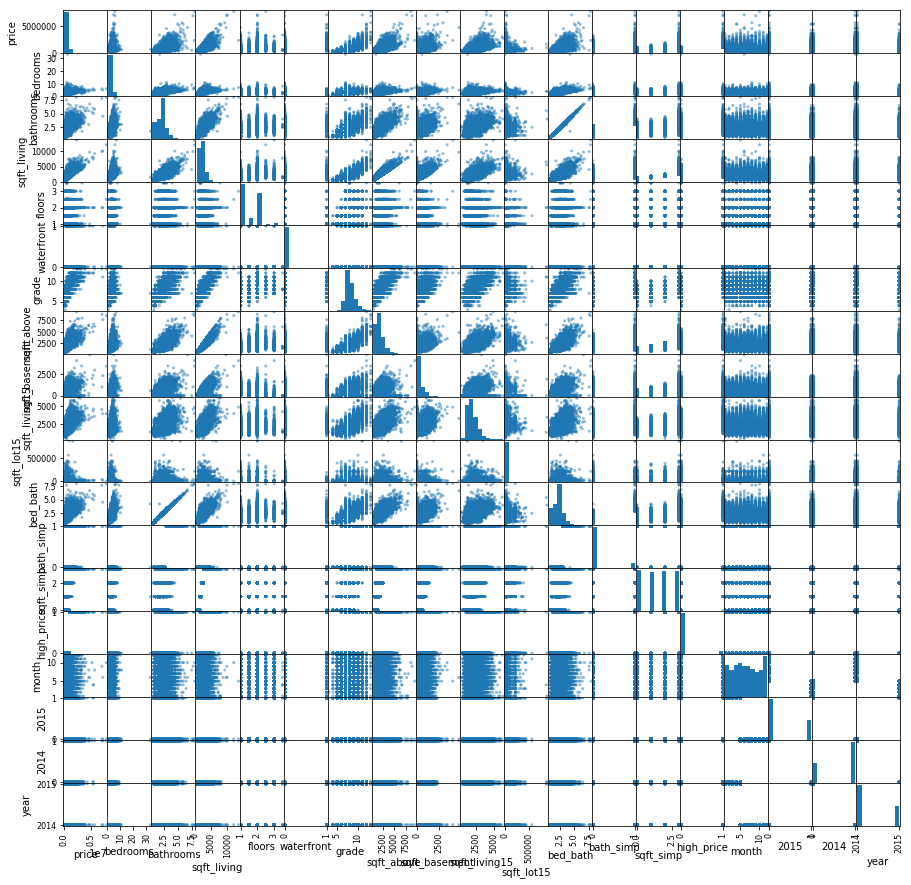

In [267]:
pd.plotting.scatter_matrix(rdata, figsize=(15,15));

In [53]:
for col in rdata.columns:
    print(col, '\n', rdata[col].value_counts().head(), '\n\n')

price 
 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64 


bedrooms 
 3    9823
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64 


bathrooms 
 2.50    5377
1.00    3850
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64 


sqft_living 
 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64 


floors 
 1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64 


waterfront 
 0.0    21450
1.0      146
Name: waterfront, dtype: int64 


grade 
 7     8974
8     6065
9     2615
6     2038
10    1134
Name: grade, dtype: int64 


sqft_above 
 1300    212
1010    210
1200    206
1220    192
1140    184
Name: sqft_above, dtype: int64 


sqft_basement 
 0.0      13279
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64 


yr_built 
 2014    559
2006    453
2005    450
2004    433
2003    

Checking out the general look of the amount of square feet in the living space as that has the highest correlation with the price

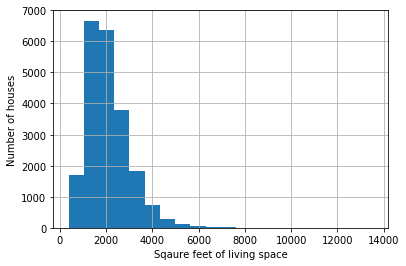

In [816]:
rdata.sqft_living.hist(bins=20)
plt.xlabel('Sqaure feet of living space')
plt.ylabel('Number of houses')
plt.show()

Before checking into this, I would like to find other aspects of the houses that I can possibly use in conjunction with the living space to be able to make a model that can properly predict prices

[Back to Table of Contents](#Table-of-contents)

## Q1: Does the amount of views of a home before it is sold show anything about the final sale price?

I was wondering if having more views or less views is connected in anyway with the price of the house.  
First I created a dataframe with only rows that had views so I could check on just houses that were viewed and anylaze them alone.

In [29]:
a = data.loc[data['view'] > 0]

In [31]:
a.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
58,7922800400,2014-08-27,951000.0,5,3.25,3250,14342,2.0,0.0,4.0,...,8,3250,0.0,1968,0.0,98008,47.5880,-122.116,2960,11044
60,1516000055,2014-12-10,650000.0,3,2.25,2150,21235,1.0,0.0,3.0,...,8,1590,560.0,1959,0.0,98166,47.4336,-122.339,2570,18900


I will make a plot to see what the frequency of views relation is to the price

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


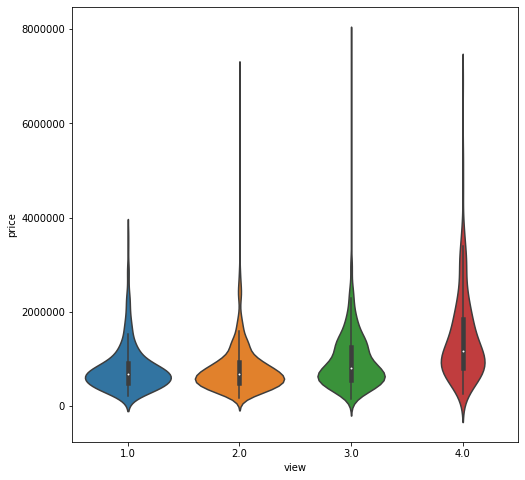

In [32]:
plt.figure(figsize=(8,8))
sns.violinplot(x=a.view, y=a.price, data=a)
plt.show()

In [35]:
np.corrcoef(a.view, a.price)

array([[1.        , 0.30154011],
       [0.30154011, 1.        ]])

In [41]:
rdata.drop(['view'], axis=1, inplace=True)

Views of the house does not seem to indicate much about the price, seems that a bunch of outliers are affecting the correlation score on this so I dropped it from rdata  

Conculsion for a buyer or seller: I would not recommend checking on how many people previously saw a house as it does not seem to give useful data about the price of the house

[Back to Table of Contents](#Table-of-contents)

## Q2: Does the condition score of the house have an affect on the price?

First I will check on what type of scores we have.

In [43]:
rdata.condition.value_counts()

3    14020
4     5677
5     1701
2      169
1       29
Name: condition, dtype: int64

I will make a plot to see if the condition seems to be indicative of the price

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


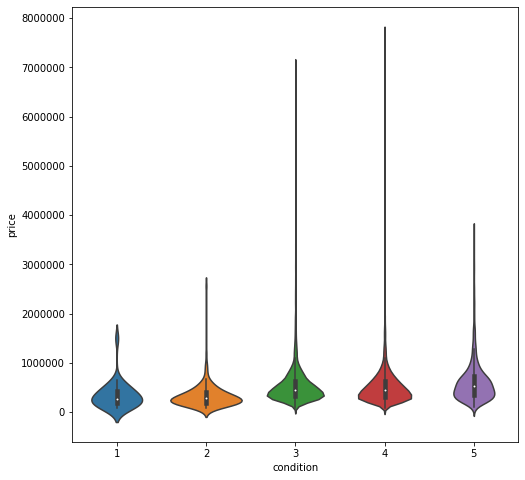

In [36]:
plt.figure(figsize=(8,8))
sns.violinplot(x=rdata.condition, y=rdata.price, data=rdata)
plt.show()

Check the coefficiant score as well, to see what it can tell me.

In [37]:
np.corrcoef(rdata.condition, rdata.price)

array([[1.        , 0.03594763],
       [0.03594763, 1.        ]])

In [45]:
rdata.drop(['condition'], axis=1, inplace=True)

Scores do not seem to indicate the price, as is shown in the coeff so I dropped this column as well

For a buyer that wants a cheap house, should checkout houses with all ratings as there seem to be cheaper houses with all types of ratings.  
For a buyer that wants to buy a expensive house, I would say to checkout ratings of 3 and above but in that category a higher rating does not indicate a higher price. However for such a buyer checking out houses with a 1 or 2 rating would not be something that I would recommend as they are usually cheaper

[Back to Table of Contents](#Table-of-contents)

## Q3: Does the size of a lot have an affect on the price?

I will make a scatter plot to check on the general look of the distribution of this category and prices

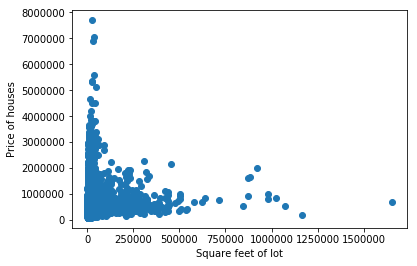

In [828]:
plt.scatter(data.sqft_lot, data.price)
plt.xlabel('Square feet of lot')
plt.ylabel('Price of houses')
plt.show()

It seems very skewed, let's see if logging it will help that

In [827]:
rdata['log_lot'] = np.log(data['sqft_lot'])

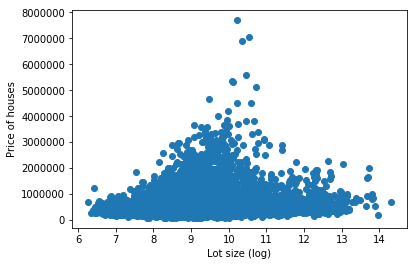

In [829]:
plt.scatter(rdata.log_lot, rdata.price)
plt.xlabel('Lot size (log)')
plt.ylabel('Price of houses')
plt.show()

It seems to just show us similar information, that the higher value homes are more to the middle of the lot size and big lots or small lots do not have much to do with the price.  
Checking to see if the coefficant if confirms this or not.

In [265]:
np.corrcoef(rdata.log_lot, rdata.price)

array([[1.        , 0.16155166],
       [0.16155166, 1.        ]])

In [833]:
rdata.drop(['sqft_lot'], axis=1, inplace=True)

In [831]:
rdata.drop(['log_lot'], axis=1, inplace=True)

As shown in the coeff score and the scatter plot, average lots seem to be where there is the most variation in price so I can not really recommend anything based on lot size.  
I dropped this column as well

I would not be able to make a recommendation for a buyer of a cheaper or more expensive house based on lot size as it does not seem to be something that affects it much

[Back to Table of Contents](#Table-of-contents)

## Q4: Does year built or year renovated affect the price?

In [834]:
rdata['yr_built'] = data.yr_built
rdata['yr_renovated'] = data.yr_renovated

In [844]:
rdata['yr_built'] = data.yr_built

In [846]:
rdata['yr_renovated'] = data.yr_renovated

Make a scatter plot to see the distrubution of the year a house was built and the price

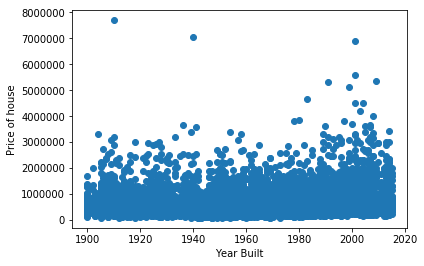

In [835]:
plt.scatter(rdata.yr_built, rdata.price)
plt.xlabel('Year Built')
plt.ylabel('Price of house')
plt.show()

Check the histogram to see the genral frequancey of the years built and renovated

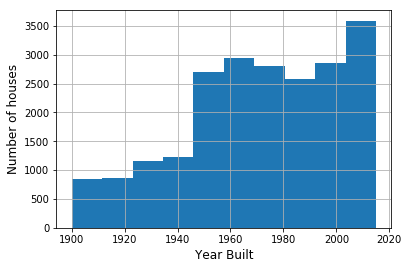

In [845]:
rdata.yr_built.hist()
plt.xlabel('Year Built')
plt.ylabel('Number of houses')
plt.show()

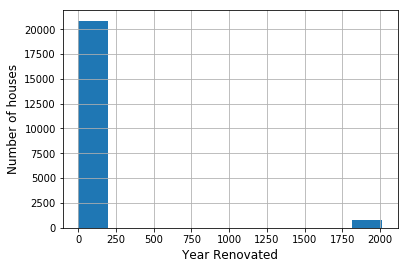

In [847]:
rdata.yr_renovated.hist()
plt.xlabel('Year Renovated')
plt.ylabel('Number of houses')
plt.show()

It seems very few homes were renovated, let's see if that affects price in any way

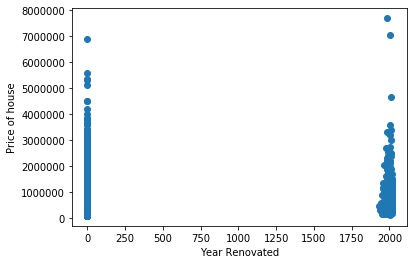

In [39]:
plt.scatter(rdata.yr_renovated, rdata.price)
plt.xlabel('Year Renovated')
plt.ylabel('Price of house')
plt.show()

I would like to check further into this, let us simplify this by making a column showing 1 if renovated and 0 if not then check the information further

In [849]:
rdata["yr_renovated_simp"] = [1 if yr > 2 else 0 for yr in rdata.yr_renovated]

Checking coefficiant and frequency of both categories with regards to price

In [57]:
np.corrcoef(rdata.yr_renovated_simp, rdata.price)

array([[1.        , 0.11753677],
       [0.11753677, 1.        ]])

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


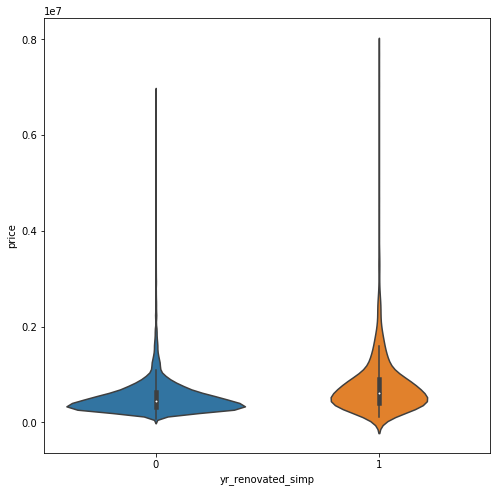

In [58]:
plt.figure(figsize=(8,8))
sns.violinplot(x='yr_renovated_simp', y='price', data=rdata)
plt.show()

In [850]:
# dropping yr built and yr renovated as they do not seem to impact anything much
rdata.drop(['yr_built', 'yr_renovated', 'yr_renovated_simp'], axis=1, inplace=True)

Neither of these seem to affect the price as they both have cheaper and expensive houses in about the same distribution.  
I can not use this information to make any recommendations to the buyer so I dropped these columns as well

[Back to Table of Contents](#Table-of-contents)

## Q5: Do the amount of floors a house have an affect on the price?

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


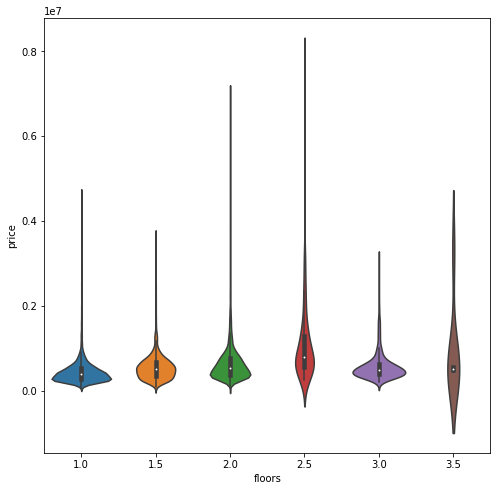

In [61]:
plt.figure(figsize=(8,8))
sns.violinplot(x='floors', y='price', data=rdata)
plt.show()

This does not seem to be affecting price much, even in the lower ranges.  
I can not recommend anything to a buyer based on amount of floors

[Back to Table of Contents](#Table-of-contents)

## Q6: Does the grade show anything on the price?

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


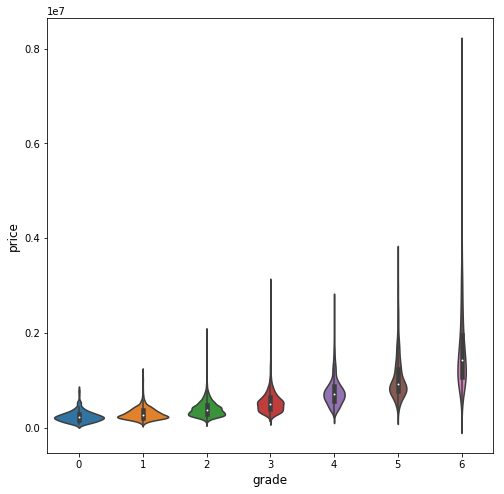

In [842]:
plt.figure(figsize=(8,8))
sns.violinplot(x='grade', y='price', data=rdata)
plt.show()

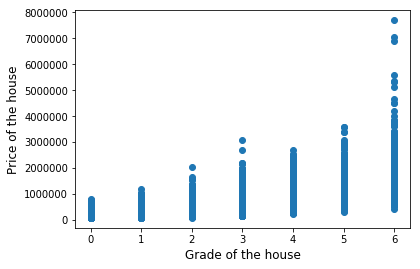

In [851]:
plt.scatter(rdata.grade, rdata.price)
plt.xlabel('Grade of the house')
plt.ylabel('Price of the house')
plt.show()

From the above graph there seems to be a clear upwards trend with higher grades.  
I will now test below the affects of splitting up the grades into categories to see what I can figure out from that

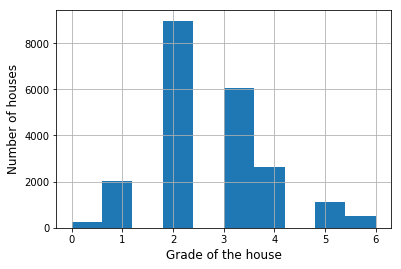

In [852]:
rdata.grade.hist()
plt.xlabel('Grade of the house')
plt.ylabel('Number of houses')
plt.show()

In [297]:
rdata.grade.value_counts()

2    8974
3    6065
4    2615
1    2038
5    1134
6     501
0     269
Name: grade, dtype: int64

In [312]:
rdata.grade = data.grade

In [313]:
bins = [0, 5, 6, 7, 8, 9, 10, 13]

In [314]:
bins_grade = pd.cut(rdata.grade, bins)

In [315]:
bins_grade = bins_grade.cat.as_unordered()

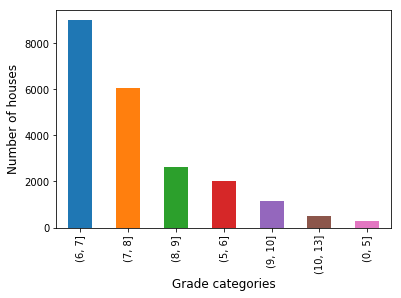

In [853]:
bins_grade.value_counts().plot(kind='bar')
plt.xlabel('Grade categories')
plt.ylabel('Number of houses')
plt.show()

In [317]:
bins_grade.head()

0    (6, 7]
1    (6, 7]
2    (5, 6]
3    (6, 7]
4    (7, 8]
Name: grade, dtype: category
Categories (7, interval[int64]): [(0, 5], (5, 6], (6, 7], (7, 8], (8, 9], (9, 10], (10, 13]]

In [324]:
rdata['grade'] = bins_grade.cat.codes

In [319]:
gd = pd.get_dummies(rdata.grade, prefix='grade')

In [320]:
rdata = pd.concat([rdata, gd], axis=1)
rdata.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,sqft_living15,...,2015,2014,year,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6
0,221900.0,3,1.00,1180,1.0,0.0,2,1180,0.0,1340,...,0,1,2014,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,2.0,0.0,2,2170,400.0,1690,...,0,1,2014,0,0,1,0,0,0,0
2,180000.0,2,1.00,770,1.0,0.0,1,770,0.0,2720,...,1,0,2015,0,1,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0.0,2,1050,910.0,1360,...,0,1,2014,0,0,1,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0.0,3,1680,0.0,1800,...,1,0,2015,0,0,0,1,0,0,0


In [325]:
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,2014,year,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade
price,1.000000,0.308777,0.525871,0.701900,0.256768,0.264310,0.605351,0.321086,0.585213,0.082835,...,-0.003691,0.003691,-0.090170,-0.209487,-0.316112,0.004544,0.235847,0.340943,0.478278,0.654335
bedrooms,0.308777,1.000000,0.514508,0.578210,0.177931,-0.002129,0.479380,0.297221,0.393399,0.030686,...,0.009962,-0.009962,-0.129986,-0.239500,-0.104809,0.073129,0.160288,0.135762,0.137155,0.355900
bathrooms,0.525871,0.514508,1.000000,0.755742,0.502555,0.063627,0.686655,0.278457,0.569845,0.088291,...,0.026625,-0.026625,-0.149541,-0.366226,-0.313534,0.189395,0.264744,0.272632,0.304703,0.663623
sqft_living,0.701900,0.578210,0.755742,1.000000,0.353924,0.104635,0.876444,0.428644,0.756386,0.184336,...,0.029050,-0.029050,-0.138170,-0.312512,-0.358973,0.071086,0.318490,0.369227,0.434371,0.756034
floors,0.256768,0.177931,0.502555,0.353924,1.000000,0.020794,0.523971,-0.241901,0.280062,-0.010732,...,0.022382,-0.022382,-0.085809,-0.230547,-0.308293,0.201168,0.244174,0.173936,0.132775,0.462537
waterfront,0.264310,-0.002129,0.063627,0.104635,0.020794,1.000000,0.071776,0.083048,0.083822,0.030657,...,0.005021,-0.005021,0.011114,-0.007303,-0.045486,-0.011320,0.007485,0.051513,0.096147,0.079766
sqft_above,0.605351,0.479380,0.686655,0.876444,0.523971,0.071776,1.000000,-0.051202,0.731757,0.195071,...,0.023810,-0.023810,-0.118493,-0.280779,-0.387302,0.059400,0.343380,0.376396,0.421314,0.751067
sqft_basement,0.321086,0.297221,0.278457,0.428644,-0.241901,0.083048,-0.051202,1.000000,0.199258,0.015878,...,0.015018,-0.015018,-0.063877,-0.120919,-0.019881,0.035500,0.017895,0.060505,0.112560,0.161054
sqft_living15,0.585213,0.393399,0.569845,0.756386,0.280062,0.083822,0.731757,0.199258,1.000000,0.183508,...,0.021592,-0.021592,-0.097432,-0.281448,-0.378259,0.073337,0.339535,0.360826,0.367286,0.713132
sqft_lot15,0.082835,0.030686,0.088291,0.184336,-0.010732,0.030657,0.195071,0.015878,0.183508,1.000000,...,-0.000155,0.000155,0.012610,-0.020566,-0.066239,-0.031786,0.063188,0.074023,0.095777,0.119316


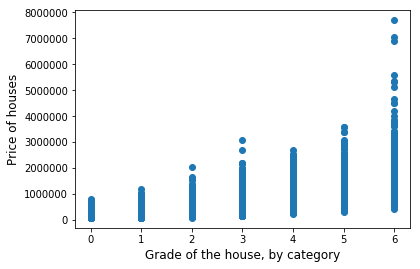

In [854]:
plt.scatter(rdata.grade, rdata.price)
plt.xlabel('Grade of the house, by category')
plt.ylabel('Price of houses')
plt.show()

We are still seeing that clear upwards trend and I will make some test models just to see if splitting grade up like this is a good option for a model or not

In [482]:
model = sm.OLS(rdata.price, rdata[['waterfront', 'grade_0', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     3425.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:24:15   Log-Likelihood:            -2.9931e+05
No. Observations:               21596   AIC:                         5.986e+05
Df Residuals:                   21588   BIC:                         5.987e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waterfront  8.741e+05   2.11e+04     41.347      0.000    8.33e+05    9.16e+05
grade_0     2.324e+05   1.54e+04     15.066      0.000    2.02e+05    2.63e+05
grade_1     2.976e+05   5603.339     53.116      0.000    2.87e+05    3.09e+05
grade_2     4.005e+05   2670.275    150.003      0.000    3.95e+05    4.06e+05
grade_3     5.384e+05   3249.490    165.680      0.000    5.32e+05    5.45e+05
grade_4     7.664e+05   4949.021    154.856      0.000    7.57e+05    7.76e+05
grade_5     1.051e+06   7528.604    139.570      0.000    1.04e+06    1.07e+06
grade_6      1.63e+06   1.14e+04    143.400      0.000    1.61e+06    1.65e+06
==============================================================================
Omnibus:                    17846.077   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1783554.301
Skew:                           3.401   Prob(JB):                         0.00
Kurtosis:                      46.998   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [483]:
model = sm.OLS(rdata.price, rdata[['grade']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 9.782e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:24:41   Log-Likelihood:            -3.0135e+05
No. Observations:               21596   AIC:                         6.027e+05
Df Residuals:                   21595   BIC:                         6.027e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       2.044e+05    653.567    312.756      0.000    2.03e+05    2.06e+05
==============================================================================
Omnibus:                    21149.797   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2711652.934
Skew:                           4.462   Prob(JB):                         0.00
Kurtosis:                      57.165   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Put lat and long back into the dataframe to see if location figured with those variables will affect the model

In [421]:
rdata['lat'] = data.lat

In [422]:
rdata['long'] = data.long

In [429]:
model = sm.OLS(rdata.price, rdata[['grade', 'lat', 'long']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                 3.523e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:03:59   Log-Likelihood:            -3.0066e+05
No. Observations:               21596   AIC:                         6.013e+05
Df Residuals:                   21593   BIC:                         6.013e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       1.971e+05   1619.392    121.736      0.000    1.94e+05       2e+05
lat         4.945e+05   1.31e+04     37.619      0.000    4.69e+05     5.2e+05
long        1.923e+05   5108.362     37.640      0.000    1.82e+05    2.02e+05
==============================================================================
Omnibus:                    22457.308   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3474997.173
Skew:                           4.894   Prob(JB):                         0.00
Kurtosis:                      64.368   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

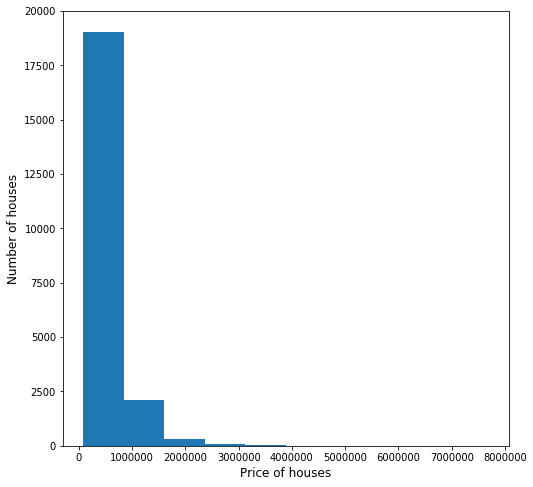

In [856]:
plt.figure(figsize=(8,8))
plt.hist(rdata.price)
plt.xlabel('Price of houses')
plt.ylabel('Number of houses')
plt.show()

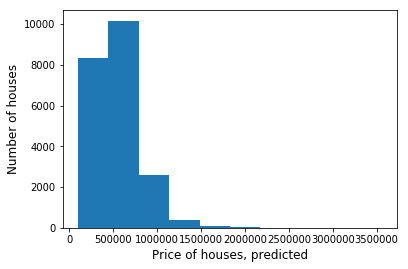

In [857]:
plt.hist(model.predict())
plt.xlabel('Price of houses, predicted')
plt.ylabel('Number of houses')
plt.show()

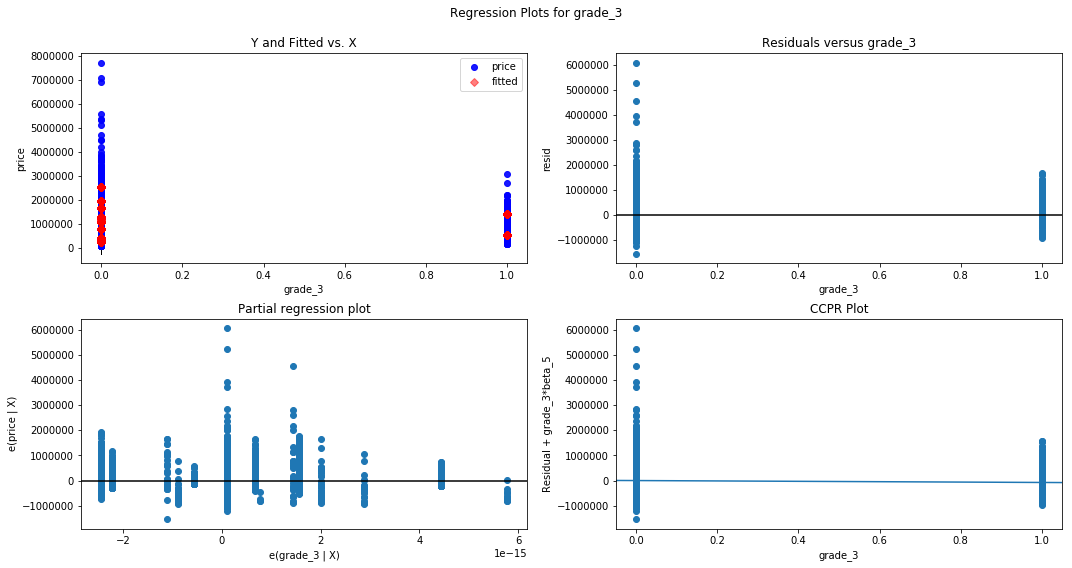

In [372]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'grade_3' ,fig=fig)
plt.show()

Grade seems to have a signifigant affect on the price, and due to how it is strongly it is correlated with so many other factors, I would like to try and use it in the end model.  
However, I will need to find the correct things to use along with it  
Lat and Long also seem to be worth keeping in and I will check into their affect more on the final model

Conclusion for a buyer at this point:
In general, the higher the grade, the higher the average price, though you can find houses with good grades for lower prices as well

[Back to Table of Contents](#Table-of-contents)

## Q7: What affect does waterfront have on price?

Check a violin plot to see what the affect of waterfront is on the house price

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


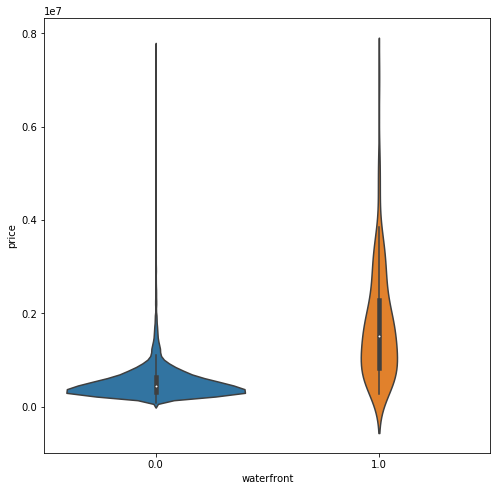

In [63]:
plt.figure(figsize=(8,8))
sns.violinplot(x='waterfront', y='price', data=rdata)
plt.show()

How many waterfront homes are in the data?

In [373]:
rdata.waterfront.value_counts()

0.0    21450
1.0      146
Name: waterfront, dtype: int64

What is the correlation between waterfront and other categories and what does it tell us?

In [46]:
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_simp,bath_simp
price,1.000000,0.308777,0.525871,0.701900,0.089868,0.256768,0.264310,0.393493,0.035948,0.667931,0.605351,0.321086,0.053918,0.117849,0.585213,0.082835,0.523666,0.450486
bedrooms,0.308777,1.000000,0.514508,0.578210,0.032467,0.177931,-0.002129,0.078349,0.026458,0.356564,0.479380,0.297221,0.155659,0.017896,0.393399,0.030686,0.580115,0.328098
bathrooms,0.525871,0.514508,1.000000,0.755742,0.088363,0.502555,0.063627,0.186005,-0.126645,0.665797,0.686655,0.278457,0.507156,0.047167,0.569845,0.088291,0.695360,0.652713
sqft_living,0.701900,0.578210,0.755742,1.000000,0.173447,0.353924,0.104635,0.281708,-0.059562,0.762776,0.876444,0.428644,0.318129,0.051052,0.756386,0.184336,0.869676,0.529402
sqft_lot,0.089868,0.032467,0.088363,0.173447,1.000000,-0.004824,0.021458,0.075052,-0.008852,0.114722,0.184134,0.015025,0.052940,0.004977,0.144755,0.718203,0.133045,0.082524
floors,0.256768,0.177931,0.502555,0.353924,-0.004824,1.000000,0.020794,0.028401,-0.264201,0.458762,0.523971,-0.241901,0.489178,0.003785,0.280062,-0.010732,0.337652,0.269439
waterfront,0.264310,-0.002129,0.063627,0.104635,0.021458,0.020794,1.000000,0.380543,0.016641,0.082819,0.071776,0.083048,-0.024490,0.073938,0.083822,0.030657,0.065588,0.062584
view,0.393493,0.078349,0.186005,0.281708,0.075052,0.028401,0.380543,1.000000,0.045597,0.249080,0.166008,0.270623,-0.054462,0.090337,0.278921,0.073080,0.219553,0.183259
condition,0.035948,0.026458,-0.126645,-0.059562,-0.008852,-0.264201,0.016641,0.045597,1.000000,-0.147157,-0.159010,0.168437,-0.361707,-0.055833,-0.093220,-0.003150,-0.046944,-0.078365
grade,0.667931,0.356564,0.665797,0.762776,0.114722,0.458762,0.082819,0.249080,-0.147157,1.000000,0.756085,0.165796,0.447849,0.015605,0.713841,0.120970,0.667508,0.433846


Based on correlation scores of squarefeet in the house: 0.10, Bedrooms: -0.002, Bathrooms: 0.063 they would seem to be smaller houses.  
I would like to check that with plots to see what they are like.
I am using some categories I made in later steps to help with this, as I came back to this later to look into it more.

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


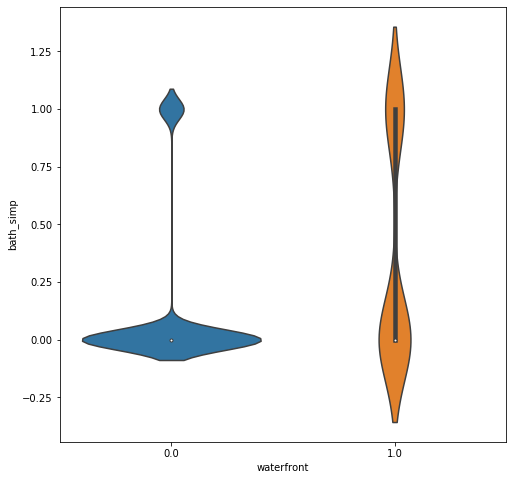

In [49]:
plt.figure(figsize=(8,8))
sns.violinplot(x='waterfront', y='bath_simp', data=rdata)
plt.show()

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


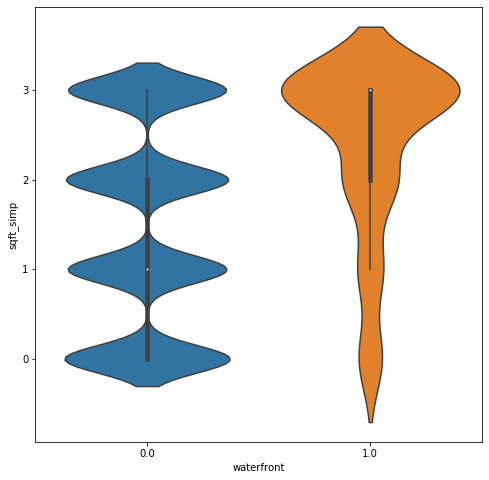

In [50]:
plt.figure(figsize=(8,8))
sns.violinplot(x='waterfront', y='sqft_simp', data=rdata)
plt.show()

From both of these it seems that they are actually about the same, or better in the case of sqft then other homes.

There are only 146 out of 21,596 properties on the waterfront, but they do seem to have a higher price in general.  
I will leave this in for now.  

Recommendation for buyer, if he wants a waterfront property, should expect to pay more for it.  

[Back to Table of Contents](#Table-of-contents)


## Q8: Will combining bedrooms and bathrooms result in a better coefficient with the price?
Due to the high correlations going on between bedrooms, bathrooms and sqft_living, I decided to try and put bedrooms and bathrooms together to see if I can get one score that would include both and better evaluate their relationship with the price  

In [73]:
weights = np.linspace(0, 1, 10000)
max_corr = -1
desired_weights = None
for weight in weights:
    weight1 = weight
    weight2 = 1 - weight
    vals = weight1*rdata.bedrooms + weight2*rdata.bathrooms
    corr_coeff = np.abs(np.corrcoef(vals, rdata.price))[0][1]
    if corr_coeff > max_corr:
        desired_weights = [weight1, weight2]
        max_corr = corr_coeff
desired_weights

[0.07950795079507951, 0.9204920492049204]

In [74]:
rdata['bed_bath'] = desired_weights[0]*rdata.bedrooms + desired_weights[1]*rdata.bathrooms

In [431]:
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_2,grade_3,grade_4,grade_5,grade_6,grade,low_price,high_price,lat,long
price,1.000000,0.308777,0.525871,0.701900,0.256768,0.264310,0.605351,0.321086,0.585213,0.082835,...,-0.316112,0.004544,0.235847,0.340943,0.478278,0.654335,-0.731715,0.731723,0.306682,0.021994
bedrooms,0.308777,1.000000,0.514508,0.578210,0.177931,-0.002129,0.479380,0.297221,0.393399,0.030686,...,-0.104809,0.073129,0.160288,0.135762,0.137155,0.355900,-0.204125,0.202989,-0.009959,0.132041
bathrooms,0.525871,0.514508,1.000000,0.755742,0.502555,0.063627,0.686655,0.278457,0.569845,0.088291,...,-0.313534,0.189395,0.264744,0.272632,0.304703,0.663623,-0.369135,0.369857,0.024254,0.224862
sqft_living,0.701900,0.578210,0.755742,1.000000,0.353924,0.104635,0.876444,0.428644,0.756386,0.184336,...,-0.358973,0.071086,0.318490,0.369227,0.434371,0.756034,-0.504005,0.504967,0.052137,0.241183
floors,0.256768,0.177931,0.502555,0.353924,1.000000,0.020794,0.523971,-0.241901,0.280062,-0.010732,...,-0.308293,0.201168,0.244174,0.173936,0.132775,0.462537,-0.158188,0.156817,0.049223,0.125913
waterfront,0.264310,-0.002129,0.063627,0.104635,0.020794,1.000000,0.071776,0.083048,0.083822,0.030657,...,-0.045486,-0.011320,0.007485,0.051513,0.096147,0.079766,-0.193812,0.194007,-0.012159,-0.037632
sqft_above,0.605351,0.479380,0.686655,0.876444,0.523971,0.071776,1.000000,-0.051202,0.731757,0.195071,...,-0.387302,0.059400,0.343380,0.376396,0.421314,0.751067,-0.429812,0.430399,-0.001215,0.344820
sqft_basement,0.321086,0.297221,0.278457,0.428644,-0.241901,0.083048,-0.051202,1.000000,0.199258,0.015878,...,-0.019881,0.035500,0.017895,0.060505,0.112560,0.161054,-0.240030,0.240822,0.109842,-0.142397
sqft_living15,0.585213,0.393399,0.569845,0.756386,0.280062,0.083822,0.731757,0.199258,1.000000,0.183508,...,-0.378259,0.073337,0.339535,0.360826,0.367286,0.713132,-0.423362,0.423272,0.048656,0.335594
sqft_lot15,0.082835,0.030686,0.088291,0.184336,-0.010732,0.030657,0.195071,0.015878,0.183508,1.000000,...,-0.066239,-0.031786,0.063188,0.074023,0.095777,0.119316,-0.051700,0.052669,-0.086144,0.255581


Conclusion: It seems to be the same as taking away bedrooms and leaving bathrooms in

[Back to Table of Contents](#Table-of-contents)

## Q9: What affect do bathrooms have on the price by themselves?

I now will to try and split bathrooms up into categories to see if there is something I can learn from that.

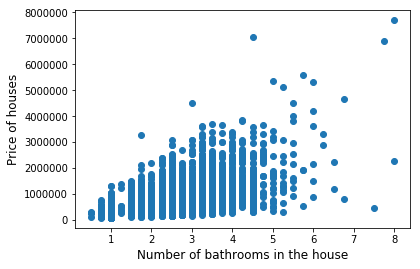

In [859]:
plt.scatter(rdata.bathrooms, rdata.price)
plt.xlabel('Number of bathrooms in the house')
plt.ylabel('Price of houses')
plt.show()

In [375]:
rdata.bathrooms.describe()

count    21596.000000
mean         2.115878
std          0.768965
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

Based on the describe, I will be splitting the data into, more then %75 as less then 2.75 bathrooms and the rest to see if this will teach me anything about the data

In [45]:
rdata["bath_simp"] = [1 if bath > 2.75 else 0 for bath in rdata.bathrooms]

In [432]:
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_2,grade_3,grade_4,grade_5,grade_6,grade,low_price,high_price,lat,long
price,1.000000,0.308777,0.525871,0.701900,0.256768,0.264310,0.605351,0.321086,0.585213,0.082835,...,-0.316112,0.004544,0.235847,0.340943,0.478278,0.654335,-0.731715,0.731723,0.306682,0.021994
bedrooms,0.308777,1.000000,0.514508,0.578210,0.177931,-0.002129,0.479380,0.297221,0.393399,0.030686,...,-0.104809,0.073129,0.160288,0.135762,0.137155,0.355900,-0.204125,0.202989,-0.009959,0.132041
bathrooms,0.525871,0.514508,1.000000,0.755742,0.502555,0.063627,0.686655,0.278457,0.569845,0.088291,...,-0.313534,0.189395,0.264744,0.272632,0.304703,0.663623,-0.369135,0.369857,0.024254,0.224862
sqft_living,0.701900,0.578210,0.755742,1.000000,0.353924,0.104635,0.876444,0.428644,0.756386,0.184336,...,-0.358973,0.071086,0.318490,0.369227,0.434371,0.756034,-0.504005,0.504967,0.052137,0.241183
floors,0.256768,0.177931,0.502555,0.353924,1.000000,0.020794,0.523971,-0.241901,0.280062,-0.010732,...,-0.308293,0.201168,0.244174,0.173936,0.132775,0.462537,-0.158188,0.156817,0.049223,0.125913
waterfront,0.264310,-0.002129,0.063627,0.104635,0.020794,1.000000,0.071776,0.083048,0.083822,0.030657,...,-0.045486,-0.011320,0.007485,0.051513,0.096147,0.079766,-0.193812,0.194007,-0.012159,-0.037632
sqft_above,0.605351,0.479380,0.686655,0.876444,0.523971,0.071776,1.000000,-0.051202,0.731757,0.195071,...,-0.387302,0.059400,0.343380,0.376396,0.421314,0.751067,-0.429812,0.430399,-0.001215,0.344820
sqft_basement,0.321086,0.297221,0.278457,0.428644,-0.241901,0.083048,-0.051202,1.000000,0.199258,0.015878,...,-0.019881,0.035500,0.017895,0.060505,0.112560,0.161054,-0.240030,0.240822,0.109842,-0.142397
sqft_living15,0.585213,0.393399,0.569845,0.756386,0.280062,0.083822,0.731757,0.199258,1.000000,0.183508,...,-0.378259,0.073337,0.339535,0.360826,0.367286,0.713132,-0.423362,0.423272,0.048656,0.335594
sqft_lot15,0.082835,0.030686,0.088291,0.184336,-0.010732,0.030657,0.195071,0.015878,0.183508,1.000000,...,-0.066239,-0.031786,0.063188,0.074023,0.095777,0.119316,-0.051700,0.052669,-0.086144,0.255581


C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


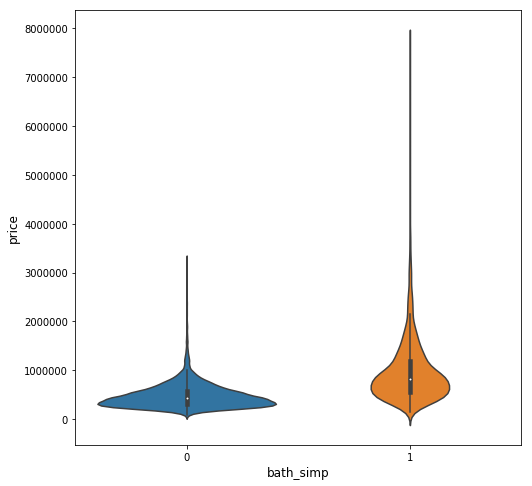

In [977]:
plt.figure(figsize=(8,8))
sns.violinplot(x='bath_simp', y='price', data=rdata)
plt.show()

It seems to affect the lower price range more then the higher one, but having more bathrooms does not seem to very highly affect the higher prices either.  
The differnce seems to be in the 1-2 million dollar range, where for that price most homes have more then 2.75 bathrooms and that homes without 2.75 bathrooms do not usually go for more then 1 million dollars.

Advice for buyer: If you want more then 2.75 bathrooms then expect to pay in the upper hundreds of thousands and up.

[Back to Table of Contents](#Table-of-contents)

## Q10: What affect does sqft of living space have on the price?

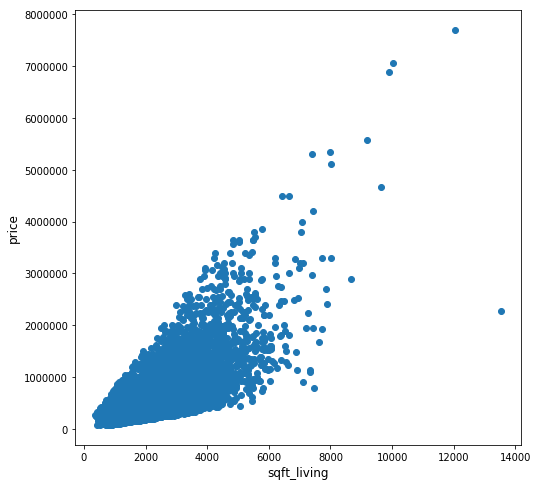

In [1028]:
plt.figure(figsize=(8,8))
plt.scatter(rdata.sqft_living, rdata.price)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [81]:
rdata.sqft_living.describe()

count    21596.000000
mean      2080.368170
std        918.102146
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

I will now split up sqft_living into 4 categories based on the percentile to see if I can see more information on this

In [43]:
sqft_simp = []
for sqft in rdata.sqft_living:
    if sqft > 2550:
        sqft_simp.append(3)
    elif sqft > 1910:
        sqft_simp.append(2)
    elif sqft > 1430:
        sqft_simp.append(1)
    else:
        sqft_simp.append(0)    

In [44]:
rdata['sqft_simp'] = sqft_simp
rdata.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_simp
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639,3
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000,2
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503,1


C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


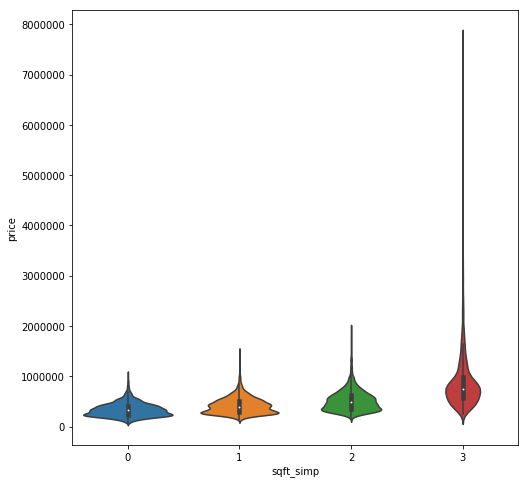

In [84]:
plt.figure(figsize=(8,8))
sns.violinplot(x='sqft_simp', y='price', data=rdata)
plt.show()

Squarefeet seem to have more of an affect on lower value houses, though the highest value homes seem to be in the highest category of squarefeet as well.

Advice for buyer: If you want a big house then you can get one for under 1 million dollars, though in the upper hundreds of thousands.
Though other prefernces would also need to be checked into, unless size is the only factor for the buyer

[Back to Table of Contents](#Table-of-contents)

## Q11: Difference between houses over 1 Million dollars and under?
From our previous research it seems that most houses are under 1 million dollars and it seems a lot of the factors mainly affect houses under 1 million dollars. What are the differences in the affects of the variables on houses under 1 million and over 1 million?

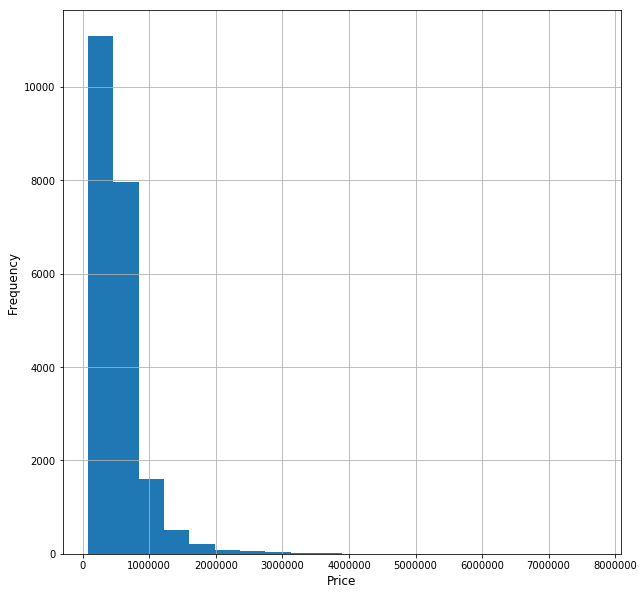

In [1026]:
plt.figure(figsize=(10,10))
rdata.price.hist(bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [86]:
rdata.price.describe()

count    2.159600e+04
mean     5.403159e+05
std      3.673657e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Even at the %75 percentile, it is still only $650,000  
I will make a new category for price under 1 million dollars to see if I can zero in on what affects most of the prices

In [380]:
rdata['price2'] = [1 if p < 1000000 else 0 for p in rdata.price]

In [388]:
rdata['price3'] = [1 if p > 1000000 else 0 for p in rdata.price]

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


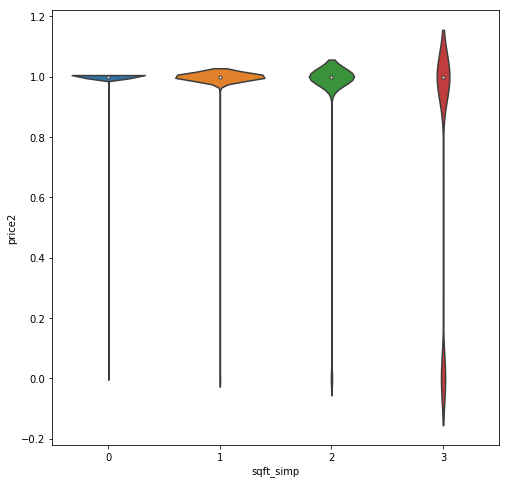

In [381]:
plt.figure(figsize=(8,8))
sns.violinplot(x='sqft_simp', y='price2', data=rdata)
plt.show()

In [382]:
rdata.price2.value_counts()

1    20106
0     1490
Name: price2, dtype: int64

In [389]:
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade,low_price,price3
price,1.000000,0.308777,0.525871,0.701900,0.256768,0.264310,0.605351,0.321086,0.585213,0.082835,...,-0.090170,-0.209487,-0.316112,0.004544,0.235847,0.340943,0.478278,0.654335,-0.731715,0.731723
bedrooms,0.308777,1.000000,0.514508,0.578210,0.177931,-0.002129,0.479380,0.297221,0.393399,0.030686,...,-0.129986,-0.239500,-0.104809,0.073129,0.160288,0.135762,0.137155,0.355900,-0.204125,0.202989
bathrooms,0.525871,0.514508,1.000000,0.755742,0.502555,0.063627,0.686655,0.278457,0.569845,0.088291,...,-0.149541,-0.366226,-0.313534,0.189395,0.264744,0.272632,0.304703,0.663623,-0.369135,0.369857
sqft_living,0.701900,0.578210,0.755742,1.000000,0.353924,0.104635,0.876444,0.428644,0.756386,0.184336,...,-0.138170,-0.312512,-0.358973,0.071086,0.318490,0.369227,0.434371,0.756034,-0.504005,0.504967
floors,0.256768,0.177931,0.502555,0.353924,1.000000,0.020794,0.523971,-0.241901,0.280062,-0.010732,...,-0.085809,-0.230547,-0.308293,0.201168,0.244174,0.173936,0.132775,0.462537,-0.158188,0.156817
waterfront,0.264310,-0.002129,0.063627,0.104635,0.020794,1.000000,0.071776,0.083048,0.083822,0.030657,...,0.011114,-0.007303,-0.045486,-0.011320,0.007485,0.051513,0.096147,0.079766,-0.193812,0.194007
sqft_above,0.605351,0.479380,0.686655,0.876444,0.523971,0.071776,1.000000,-0.051202,0.731757,0.195071,...,-0.118493,-0.280779,-0.387302,0.059400,0.343380,0.376396,0.421314,0.751067,-0.429812,0.430399
sqft_basement,0.321086,0.297221,0.278457,0.428644,-0.241901,0.083048,-0.051202,1.000000,0.199258,0.015878,...,-0.063877,-0.120919,-0.019881,0.035500,0.017895,0.060505,0.112560,0.161054,-0.240030,0.240822
sqft_living15,0.585213,0.393399,0.569845,0.756386,0.280062,0.083822,0.731757,0.199258,1.000000,0.183508,...,-0.097432,-0.281448,-0.378259,0.073337,0.339535,0.360826,0.367286,0.713132,-0.423362,0.423272
sqft_lot15,0.082835,0.030686,0.088291,0.184336,-0.010732,0.030657,0.195071,0.015878,0.183508,1.000000,...,0.012610,-0.020566,-0.066239,-0.031786,0.063188,0.074023,0.095777,0.119316,-0.051700,0.052669


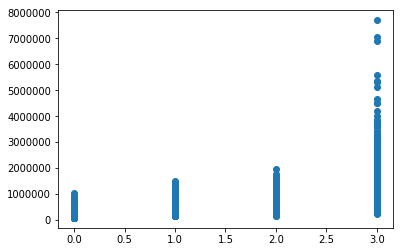

In [385]:
plt.scatter(rdata.sqft_simp, rdata.price);

In [434]:
rdata.sqft_simp.value_counts()

0    5511
2    5432
3    5357
1    5296
Name: sqft_simp, dtype: int64

In the top category, about only %20 of the properties are over 1 million dollars as there are properties in the other 2 sections that are over 1 million dollars as well and the total number of properties over 1 million dollars is only 1490

In [386]:
rdata.rename(columns={'price2':'low_price'}, inplace=True)

In [391]:
rdata.rename(columns={'price3':'high_price'}, inplace=True)

In [392]:
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade,low_price,high_price
price,1.000000,0.308777,0.525871,0.701900,0.256768,0.264310,0.605351,0.321086,0.585213,0.082835,...,-0.090170,-0.209487,-0.316112,0.004544,0.235847,0.340943,0.478278,0.654335,-0.731715,0.731723
bedrooms,0.308777,1.000000,0.514508,0.578210,0.177931,-0.002129,0.479380,0.297221,0.393399,0.030686,...,-0.129986,-0.239500,-0.104809,0.073129,0.160288,0.135762,0.137155,0.355900,-0.204125,0.202989
bathrooms,0.525871,0.514508,1.000000,0.755742,0.502555,0.063627,0.686655,0.278457,0.569845,0.088291,...,-0.149541,-0.366226,-0.313534,0.189395,0.264744,0.272632,0.304703,0.663623,-0.369135,0.369857
sqft_living,0.701900,0.578210,0.755742,1.000000,0.353924,0.104635,0.876444,0.428644,0.756386,0.184336,...,-0.138170,-0.312512,-0.358973,0.071086,0.318490,0.369227,0.434371,0.756034,-0.504005,0.504967
floors,0.256768,0.177931,0.502555,0.353924,1.000000,0.020794,0.523971,-0.241901,0.280062,-0.010732,...,-0.085809,-0.230547,-0.308293,0.201168,0.244174,0.173936,0.132775,0.462537,-0.158188,0.156817
waterfront,0.264310,-0.002129,0.063627,0.104635,0.020794,1.000000,0.071776,0.083048,0.083822,0.030657,...,0.011114,-0.007303,-0.045486,-0.011320,0.007485,0.051513,0.096147,0.079766,-0.193812,0.194007
sqft_above,0.605351,0.479380,0.686655,0.876444,0.523971,0.071776,1.000000,-0.051202,0.731757,0.195071,...,-0.118493,-0.280779,-0.387302,0.059400,0.343380,0.376396,0.421314,0.751067,-0.429812,0.430399
sqft_basement,0.321086,0.297221,0.278457,0.428644,-0.241901,0.083048,-0.051202,1.000000,0.199258,0.015878,...,-0.063877,-0.120919,-0.019881,0.035500,0.017895,0.060505,0.112560,0.161054,-0.240030,0.240822
sqft_living15,0.585213,0.393399,0.569845,0.756386,0.280062,0.083822,0.731757,0.199258,1.000000,0.183508,...,-0.097432,-0.281448,-0.378259,0.073337,0.339535,0.360826,0.367286,0.713132,-0.423362,0.423272
sqft_lot15,0.082835,0.030686,0.088291,0.184336,-0.010732,0.030657,0.195071,0.015878,0.183508,1.000000,...,0.012610,-0.020566,-0.066239,-0.031786,0.063188,0.074023,0.095777,0.119316,-0.051700,0.052669


In [440]:
tdata = rdata.loc[rdata['price'] < 1000000] 

In [441]:
tdata.drop(['high_price'], axis=1, inplace=True)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [442]:
tdata.drop(['low_price'], axis=1, inplace=True)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [443]:
tdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade,lat,long
price,1.000000,0.287373,0.439713,0.604282,0.269190,0.050019,0.515619,0.218191,0.549269,0.082971,...,-0.132107,-0.286690,-0.306836,0.167996,0.362873,0.302364,0.135751,0.617917,0.440612,0.079539
bedrooms,0.287373,1.000000,0.488130,0.587064,0.152127,-0.028655,0.463725,0.274221,0.369654,0.021612,...,-0.131041,-0.235389,-0.064623,0.104439,0.157426,0.097733,0.053692,0.312860,-0.035239,0.141927
bathrooms,0.439713,0.488130,1.000000,0.711613,0.502637,-0.009904,0.632872,0.211179,0.521190,0.062639,...,-0.157039,-0.380038,-0.268107,0.278496,0.294567,0.218716,0.108186,0.606224,-0.017537,0.251349
sqft_living,0.604282,0.587064,0.711613,1.000000,0.336301,0.000421,0.849869,0.366288,0.731886,0.171779,...,-0.154821,-0.339375,-0.317549,0.177508,0.394283,0.342930,0.169651,0.693780,-0.000359,0.290858
floors,0.269190,0.152127,0.502637,0.336301,1.000000,-0.007663,0.528095,-0.297568,0.267057,-0.022449,...,-0.084509,-0.226712,-0.291840,0.240277,0.261155,0.153846,0.061707,0.458082,0.032466,0.137578
waterfront,0.050019,-0.028655,-0.009904,0.000421,-0.007663,1.000000,-0.010501,0.020105,0.003668,0.032303,...,0.029363,0.013535,-0.011782,-0.002860,0.001964,-0.003788,-0.003333,-0.013774,-0.041999,-0.056042
sqft_above,0.515619,0.463725,0.632872,0.849869,0.528095,-0.010501,1.000000,-0.170071,0.712183,0.173338,...,-0.127184,-0.294514,-0.359459,0.150481,0.429435,0.367182,0.184459,0.700804,-0.055922,0.393685
sqft_basement,0.218191,0.274221,0.211179,0.366288,-0.297568,0.020105,-0.170071,1.000000,0.112492,0.014437,...,-0.064298,-0.113567,0.039316,0.065267,-0.019227,-0.005516,-0.008282,0.061009,0.097554,-0.147706
sqft_living15,0.549269,0.369654,0.521190,0.731886,0.267057,0.003668,0.712183,0.112492,1.000000,0.177943,...,-0.099981,-0.291164,-0.343816,0.151714,0.402423,0.349564,0.172427,0.664575,0.010980,0.376676
sqft_lot15,0.082971,0.021612,0.062639,0.171779,-0.022449,0.032303,0.173338,0.014437,0.177943,1.000000,...,0.015189,-0.017407,-0.059750,-0.023219,0.077655,0.085253,0.058390,0.101414,-0.097060,0.246032


In [444]:
Ldata = rdata.loc[rdata['price'] > 1000000] 

In [445]:
Ldata.drop(['low_price'], axis=1, inplace=True)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [446]:
Ldata.drop(['high_price'], axis=1, inplace=True)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [447]:
Ldata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade,lat,long
price,1.000000,0.173418,0.424113,0.563332,0.080255,0.305010,0.439667,0.251408,0.245755,0.029494,...,NaN,-0.044339,-0.058596,-0.165427,-0.172712,-0.008431,0.325951,0.338793,0.016093,-0.047439
bedrooms,0.173418,1.000000,0.434377,0.405094,0.128116,-0.134344,0.312331,0.190625,0.138315,0.010882,...,NaN,-0.069566,-0.034442,-0.102825,-0.032812,0.018699,0.109415,0.149876,0.000757,0.089593
bathrooms,0.424113,0.434377,1.000000,0.715255,0.278379,-0.021104,0.622502,0.208613,0.256622,0.168791,...,NaN,-0.123773,-0.117714,-0.294495,-0.207576,0.060880,0.413524,0.507499,-0.057621,0.245552
sqft_living,0.563332,0.405094,0.715255,1.000000,0.227660,0.024178,0.823985,0.367680,0.462219,0.256258,...,NaN,-0.109982,-0.116846,-0.317617,-0.280903,0.014159,0.549141,0.604837,-0.114351,0.346521
floors,0.080255,0.128116,0.278379,0.227660,1.000000,-0.032024,0.432077,-0.302890,-0.044958,0.015724,...,NaN,-0.073439,-0.086033,-0.211769,-0.081775,0.083588,0.188329,0.289280,0.025313,0.004072
waterfront,0.305010,-0.134344,-0.021104,0.024178,-0.032024,1.000000,-0.024836,0.082373,-0.003360,0.010780,...,NaN,0.031732,0.077361,0.043820,-0.060833,-0.011876,0.013573,-0.030414,-0.107814,-0.015081
sqft_above,0.439667,0.312331,0.622502,0.823985,0.432077,-0.024836,1.000000,-0.213054,0.428779,0.304974,...,NaN,-0.081503,-0.109414,-0.338053,-0.311898,0.034781,0.568279,0.629493,-0.098534,0.446253
sqft_basement,0.251408,0.190625,0.208613,0.367680,-0.302890,0.082373,-0.213054,1.000000,0.101243,-0.059366,...,NaN,-0.055381,-0.020387,0.010441,0.024173,-0.036439,0.018424,0.010218,-0.038868,-0.125121
sqft_living15,0.245755,0.138315,0.256622,0.462219,-0.044958,-0.003360,0.428779,0.101243,1.000000,0.180894,...,NaN,-0.038224,-0.087472,-0.219660,-0.244686,-0.001966,0.438522,0.457386,-0.225155,0.467588
sqft_lot15,0.029494,0.010882,0.168791,0.256258,0.015724,0.010780,0.304974,-0.059366,0.180894,1.000000,...,NaN,0.000033,-0.016829,-0.084001,-0.084732,-0.024954,0.177208,0.166334,-0.061514,0.427676


Different things seem to affect higher value and lower value houses.  
For example:  
1. Waterfront, correlation with the price of low value houses - 0.05, high value - 0.30
This would tell me that waterfront would not affect low value homes much and I would probably want to leave it out of a model for homes under 1 mil
2.     	bedrooms Low    0.287373 High   0.173418  
Makes a much bigger difference on price with lower value homes

3.      sqft_living Low   0.604282 High  0.563332  
Makes a bit more of a difference with lower value homes, though not by much

4.      bathrooms Low   0.439713 High  0.424113  
This seems to be about the same, I guess everyone cares about how many bathrooms there are
5.      grade Low   0.617917 High  0.338793  
This makes a much bigger difference with regards to low value homes then high value homes
6. Low lat	0.440612 long	0.079539     
High lat	0.016093 long -0.047439  
Interestingly lat and long seems to make a bigger difference with regards to lower value homes then higher value homes. I am not really sure what that means  


I suspect there is another factor that is affecting the prices and I will try to find it

Conclusion for buyer: If you want a house on the waterfront then it will probably be more expensive.  Also if you want a house over 1 mil then it seems there are other factors to take into account which will affect how much you pay and I have not been able to zero in on all of them. However grade is not as much of a factor as the living size or how many bathrooms there are.  If you want a house under 1 mil then certain other factors, such as how many bedrooms there are and esspecially the grade of the house will make a bigger difference.

[Back to Table of Contents](#Table-of-contents)

## Q12: How much of a factor was the year or the month in which the house was sold?

In [136]:
data.date.dt.year.value_counts()

2014    14621
2015     6975
Name: date, dtype: int64

It seems there was a big dropoff in home sales from 2014 to 2015

In [143]:
a15 = data.loc[data.date.dt.year == 2015]

In [144]:
a14 = data.loc[data.date.dt.year == 2014]

In [146]:
a15.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.975000e+03,6.975000e+03,6975.000000,6975.000000,6975.000000,6.975000e+03,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000
mean,4.621769e+09,5.422790e+05,3.359857,2.086237,2041.754265,1.543684e+04,1.476631,0.006165,0.234552,3.366595,7.605878,1760.095341,276.166452,1971.151685,58.368315,98078.051756,47.554275,-122.213922,1965.241864,12764.698925
std,2.883460e+09,3.630971e+05,0.899348,0.764920,893.372642,4.860581e+04,0.538148,0.078280,0.762081,0.618937,1.166739,812.372902,427.321591,29.127410,336.305184,53.713291,0.140513,0.139481,672.262310,29666.764018
min,1.000102e+06,8.100000e+04,1.000000,0.500000,390.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.511000,399.000000,748.000000
25%,2.131202e+09,3.249500e+05,3.000000,1.500000,1400.000000,5.060000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.456700,-122.328000,1480.000000,5120.000000
50%,3.935900e+09,4.510000e+05,3.000000,2.250000,1880.000000,7.576000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.563700,-122.229000,1820.000000,7620.000000
75%,7.413400e+09,6.439750e+05,4.000000,2.500000,2500.000000,1.050000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,520.000000,1997.000000,0.000000,98118.000000,47.675250,-122.125500,2330.000000,10000.000000
max,9.842300e+09,5.350000e+06,9.000000,6.500000,8000.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2390.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [147]:
a14.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.462100e+04,1.462100e+04,14621.000000,14621.000000,14621.000000,1.462100e+04,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000,14621.000000
mean,4.561033e+09,5.393793e+05,3.379591,2.130018,2098.789071,1.493904e+04,1.502462,0.007045,0.232542,3.430545,7.682922,1802.242049,290.292046,1970.928596,73.719445,98077.898023,47.562872,-122.214003,1996.881677,12755.668149
std,2.873342e+09,3.693934e+05,0.938873,0.770511,929.132610,3.750037e+04,0.540236,0.083639,0.765955,0.664042,1.175329,834.691624,445.609366,29.493934,376.470036,53.415704,0.137529,0.141319,691.101819,26057.894175
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,2.115510e+09,3.200000e+05,3.000000,1.750000,1440.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.477600,-122.329000,1490.000000,5098.000000
50%,3.902300e+09,4.500000e+05,3.000000,2.250000,1930.000000,7.634000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,98065.000000,47.576500,-122.231000,1850.000000,7620.000000
75%,7.299600e+09,6.450000e+05,4.000000,2.500000,2570.000000,1.079400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,560.000000,1997.000000,0.000000,98117.000000,47.678900,-122.125000,2380.000000,10125.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,560617.000000


The average price and the median price were about the same, but the max price was more in 2014

In [152]:
data.date[101]

Timestamp('2014-10-27 00:00:00')

In [157]:
b15 = []
b14 = []
for month in a15.date.dt.month:
    b15.append(month)

for month in a14.date.dt.month:
    b14.append(month)

In [172]:
b = []
for month in data.date.dt.month:
    b.append(month)

In [173]:
data['months'] = b

In [174]:
a = []
for year in data.date.dt.year:
    a.append(year)

In [175]:
data['year'] = a

In [180]:
rdata['date'] = data.date

In [448]:
rdata.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_2,grade_3,grade_4,grade_5,grade_6,grade,low_price,high_price,lat,long
0,221900.0,3,1.00,1180,1.0,0.0,1180,0.0,1340,5650,...,1,0,0,0,0,2,1,0,47.5112,-122.257
1,538000.0,3,2.25,2570,2.0,0.0,2170,400.0,1690,7639,...,1,0,0,0,0,2,1,0,47.7210,-122.319
2,180000.0,2,1.00,770,1.0,0.0,770,0.0,2720,8062,...,0,0,0,0,0,1,1,0,47.7379,-122.233
3,604000.0,4,3.00,1960,1.0,0.0,1050,910.0,1360,5000,...,1,0,0,0,0,2,1,0,47.5208,-122.393
4,510000.0,3,2.00,1680,1.0,0.0,1680,0.0,1800,7503,...,0,1,0,0,0,3,1,0,47.6168,-122.045


In [449]:
rdata['year'] = a
rdata['month'] = b
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_2,grade_3,grade_4,grade_5,grade_6,grade,low_price,high_price,lat,long
price,1.000000,0.308777,0.525871,0.701900,0.256768,0.264310,0.605351,0.321086,0.585213,0.082835,...,-0.316112,0.004544,0.235847,0.340943,0.478278,0.654335,-0.731715,0.731723,0.306682,0.021994
bedrooms,0.308777,1.000000,0.514508,0.578210,0.177931,-0.002129,0.479380,0.297221,0.393399,0.030686,...,-0.104809,0.073129,0.160288,0.135762,0.137155,0.355900,-0.204125,0.202989,-0.009959,0.132041
bathrooms,0.525871,0.514508,1.000000,0.755742,0.502555,0.063627,0.686655,0.278457,0.569845,0.088291,...,-0.313534,0.189395,0.264744,0.272632,0.304703,0.663623,-0.369135,0.369857,0.024254,0.224862
sqft_living,0.701900,0.578210,0.755742,1.000000,0.353924,0.104635,0.876444,0.428644,0.756386,0.184336,...,-0.358973,0.071086,0.318490,0.369227,0.434371,0.756034,-0.504005,0.504967,0.052137,0.241183
floors,0.256768,0.177931,0.502555,0.353924,1.000000,0.020794,0.523971,-0.241901,0.280062,-0.010732,...,-0.308293,0.201168,0.244174,0.173936,0.132775,0.462537,-0.158188,0.156817,0.049223,0.125913
waterfront,0.264310,-0.002129,0.063627,0.104635,0.020794,1.000000,0.071776,0.083048,0.083822,0.030657,...,-0.045486,-0.011320,0.007485,0.051513,0.096147,0.079766,-0.193812,0.194007,-0.012159,-0.037632
sqft_above,0.605351,0.479380,0.686655,0.876444,0.523971,0.071776,1.000000,-0.051202,0.731757,0.195071,...,-0.387302,0.059400,0.343380,0.376396,0.421314,0.751067,-0.429812,0.430399,-0.001215,0.344820
sqft_basement,0.321086,0.297221,0.278457,0.428644,-0.241901,0.083048,-0.051202,1.000000,0.199258,0.015878,...,-0.019881,0.035500,0.017895,0.060505,0.112560,0.161054,-0.240030,0.240822,0.109842,-0.142397
sqft_living15,0.585213,0.393399,0.569845,0.756386,0.280062,0.083822,0.731757,0.199258,1.000000,0.183508,...,-0.378259,0.073337,0.339535,0.360826,0.367286,0.713132,-0.423362,0.423272,0.048656,0.335594
sqft_lot15,0.082835,0.030686,0.088291,0.184336,-0.010732,0.030657,0.195071,0.015878,0.183508,1.000000,...,-0.066239,-0.031786,0.063188,0.074023,0.095777,0.119316,-0.051700,0.052669,-0.086144,0.255581


In [225]:
rdata['2015'] = [1 if year == 2015 else 0 for year in rdata.year]

In [226]:
rdata['2014'] = [1 if year == 2014 else 0 for year in rdata.year]

In [450]:
rdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_2,grade_3,grade_4,grade_5,grade_6,grade,low_price,high_price,lat,long
price,1.000000,0.308777,0.525871,0.701900,0.256768,0.264310,0.605351,0.321086,0.585213,0.082835,...,-0.316112,0.004544,0.235847,0.340943,0.478278,0.654335,-0.731715,0.731723,0.306682,0.021994
bedrooms,0.308777,1.000000,0.514508,0.578210,0.177931,-0.002129,0.479380,0.297221,0.393399,0.030686,...,-0.104809,0.073129,0.160288,0.135762,0.137155,0.355900,-0.204125,0.202989,-0.009959,0.132041
bathrooms,0.525871,0.514508,1.000000,0.755742,0.502555,0.063627,0.686655,0.278457,0.569845,0.088291,...,-0.313534,0.189395,0.264744,0.272632,0.304703,0.663623,-0.369135,0.369857,0.024254,0.224862
sqft_living,0.701900,0.578210,0.755742,1.000000,0.353924,0.104635,0.876444,0.428644,0.756386,0.184336,...,-0.358973,0.071086,0.318490,0.369227,0.434371,0.756034,-0.504005,0.504967,0.052137,0.241183
floors,0.256768,0.177931,0.502555,0.353924,1.000000,0.020794,0.523971,-0.241901,0.280062,-0.010732,...,-0.308293,0.201168,0.244174,0.173936,0.132775,0.462537,-0.158188,0.156817,0.049223,0.125913
waterfront,0.264310,-0.002129,0.063627,0.104635,0.020794,1.000000,0.071776,0.083048,0.083822,0.030657,...,-0.045486,-0.011320,0.007485,0.051513,0.096147,0.079766,-0.193812,0.194007,-0.012159,-0.037632
sqft_above,0.605351,0.479380,0.686655,0.876444,0.523971,0.071776,1.000000,-0.051202,0.731757,0.195071,...,-0.387302,0.059400,0.343380,0.376396,0.421314,0.751067,-0.429812,0.430399,-0.001215,0.344820
sqft_basement,0.321086,0.297221,0.278457,0.428644,-0.241901,0.083048,-0.051202,1.000000,0.199258,0.015878,...,-0.019881,0.035500,0.017895,0.060505,0.112560,0.161054,-0.240030,0.240822,0.109842,-0.142397
sqft_living15,0.585213,0.393399,0.569845,0.756386,0.280062,0.083822,0.731757,0.199258,1.000000,0.183508,...,-0.378259,0.073337,0.339535,0.360826,0.367286,0.713132,-0.423362,0.423272,0.048656,0.335594
sqft_lot15,0.082835,0.030686,0.088291,0.184336,-0.010732,0.030657,0.195071,0.015878,0.183508,1.000000,...,-0.066239,-0.031786,0.063188,0.074023,0.095777,0.119316,-0.051700,0.052669,-0.086144,0.255581


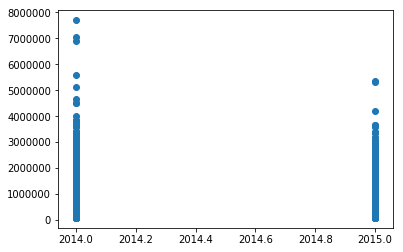

In [230]:
plt.scatter(rdata.year, rdata.price);

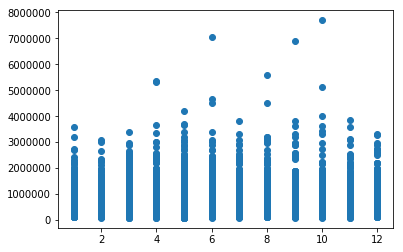

In [233]:
plt.scatter(rdata.month, rdata.price);

In [234]:
rdata.year.value_counts()

2014    14621
2015     6975
Name: year, dtype: int64

In [235]:
rdata.month.value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1469
11    1409
2     1247
1      978
Name: month, dtype: int64

Testing with models to see if I can figure anything out from that

In [456]:
model = sm.OLS(rdata.price, rdata[['year']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                 4.672e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:58:32   Log-Likelihood:            -3.0738e+05
No. Observations:               21596   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year         268.2371      1.241    216.141      0.000     265.805     270.670
==============================================================================
Omnibus:                    19102.961   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1131508.893
Skew:                           4.023   Prob(JB):                         0.00
Kurtosis:                      37.536   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [458]:
model = sm.OLS(rdata.price, rdata[['month']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 2.693e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:59:07   Log-Likelihood:            -3.1107e+05
No. Observations:               21596   AIC:                         6.221e+05
Df Residuals:                   21595   BIC:                         6.221e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month       6.691e+04    407.749    164.097      0.000    6.61e+04    6.77e+04
==============================================================================
Omnibus:                    13420.873   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333244.917
Skew:                           2.564   Prob(JB):                         0.00
Kurtosis:                      21.548   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [459]:
model = sm.OLS(rdata.price, rdata[['month', 'year']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                 2.336e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:59:35   Log-Likelihood:            -3.0738e+05
No. Observations:               21596   AIC:                         6.148e+05
Df Residuals:                   21594   BIC:                         6.148e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month      -1128.0801    802.230     -1.406      0.160   -2700.511     444.351
year         271.9182      2.897     93.859      0.000     266.240     277.597
==============================================================================
Omnibus:                    19107.999   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1133392.782
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.565   Cond. No.                         646.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: The dates do not seem to have much of an affect on the price from the coefficiant scores.  
Though as a point of interest most homes are sold from April until August and about double the amount of homes were sold in 2014 then in 2015.
I would guess that there was something that caused that but with the information I have I can not figure out what it was and therefore can not use that to predict what will happen as well

[Back to Table of Contents](#Table-of-contents)

# Modeling

## Trying to model with sqft living or grade

These 2 features are very highly related to most other factors and both seem to be good options to use for a model.  
I will run through models with both to see which work better.  
Also I would like to thin out some outliers.

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x360 with 0 Axes>

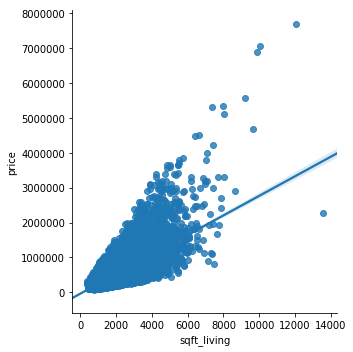

In [451]:
plt.figure(figsize=(8, 5))
sns.lmplot(x='sqft_living', y='price', data=rdata)
plt.show()

Taking out some outliers

In [465]:
trimdata = rdata.loc[rdata.price < 5000000]

In [466]:
trimdata = trimdata.loc[trimdata.sqft_living < 10000]

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x360 with 0 Axes>

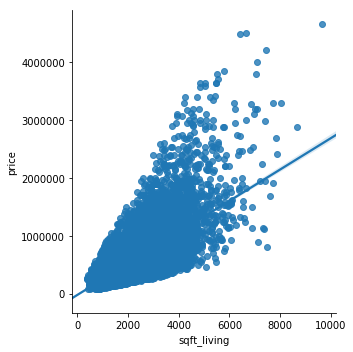

In [467]:
plt.figure(figsize=(8, 5))
sns.lmplot(x='sqft_living', y='price', data=trimdata)
plt.show()

In [471]:
trimdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,grade_2,grade_3,grade_4,grade_5,grade_6,grade,low_price,high_price,lat,long
price,1.000000,0.309525,0.522180,0.696677,0.261264,0.252989,0.600172,0.311066,0.594327,0.082442,...,-0.324833,0.008095,0.247707,0.356462,0.467030,0.667099,-0.744406,0.744227,0.316755,0.023514
bedrooms,0.309525,1.000000,0.512913,0.579019,0.176909,-0.005709,0.477888,0.294405,0.391657,0.029073,...,-0.104188,0.073786,0.160820,0.136139,0.132505,0.354262,-0.201561,0.200395,-0.010447,0.132051
bathrooms,0.522180,0.512913,1.000000,0.752915,0.502904,0.057817,0.682606,0.271032,0.567828,0.085519,...,-0.313770,0.191817,0.267103,0.274761,0.295758,0.662808,-0.364863,0.365526,0.023325,0.226028
sqft_living,0.696677,0.579019,0.752915,1.000000,0.354559,0.095364,0.874347,0.420153,0.758448,0.181700,...,-0.361447,0.074063,0.324172,0.375195,0.423420,0.758776,-0.500834,0.501706,0.051119,0.244181
floors,0.261264,0.176909,0.502904,0.354559,1.000000,0.019450,0.525362,-0.246123,0.279132,-0.011854,...,-0.308050,0.201557,0.244451,0.174117,0.130760,0.462053,-0.156892,0.155505,0.048972,0.125841
waterfront,0.252989,-0.005709,0.057817,0.095364,0.019450,1.000000,0.064112,0.076804,0.080175,0.030249,...,-0.044544,-0.010386,0.008187,0.052444,0.086906,0.075821,-0.190116,0.190252,-0.013133,-0.038051
sqft_above,0.600172,0.477888,0.682606,0.874347,0.525362,0.064112,1.000000,-0.064770,0.731630,0.192904,...,-0.388709,0.061491,0.347378,0.380346,0.412137,0.751707,-0.425562,0.426074,-0.002625,0.347633
sqft_basement,0.311066,0.294405,0.271032,0.420153,-0.246123,0.076804,-0.064770,1.000000,0.194942,0.012434,...,-0.018438,0.036850,0.018678,0.061273,0.102019,0.156830,-0.235170,0.235903,0.109436,-0.143542
sqft_living15,0.594327,0.391657,0.567828,0.758448,0.279132,0.080175,0.731630,0.194942,1.000000,0.182199,...,-0.378055,0.074216,0.340636,0.361804,0.363249,0.712227,-0.420937,0.420821,0.048144,0.336105
sqft_lot15,0.082442,0.029073,0.085519,0.181700,-0.011854,0.030249,0.192904,0.012434,0.182199,1.000000,...,-0.065922,-0.031523,0.063458,0.074241,0.093437,0.118229,-0.050083,0.051038,-0.086611,0.255390


**Test trimmed data against regular data to see which is better**

In [478]:
model1 = sm.OLS(trimdata.price, trimdata['sqft_living']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 1.179e+05
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:13:44   Log-Likelihood:            -2.9923e+05
No. Observations:               21588   AIC:                         5.985e+05
Df Residuals:                   21587   BIC:                         5.985e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   261.1124      0.760    343.358      0.000     259.622     262.603
==============================================================================
Omnibus:                    12281.443   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196531.064
Skew:                           2.409   Prob(JB):                         0.00
Kurtosis:                      16.974   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [490]:
model1 = sm.OLS(rdata.price, rdata[['sqft_living']]).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.124e+05
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:27:27   Log-Likelihood:            -3.0010e+05
No. Observations:               21596   AIC:                         6.002e+05
Df Residuals:                   21595   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1663      0.785    335.315      0.000     261.628     264.705
==============================================================================
Omnibus:                    16020.876   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           688944.001
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.954   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The trimdata has much less skew

**Test sqft living against grade to see which models are better**

In [492]:
model1a = sm.OLS(trimdata.price, trimdata[['sqft_living', 'waterfront']]).fit()
model1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.412e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:29:18   Log-Likelihood:            -2.9846e+05
No. Observations:               21588   AIC:                         5.969e+05
Df Residuals:                   21586   BIC:                         5.969e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   257.7851      0.738    349.092      0.000     256.338     259.232
waterfront   8.229e+05   2.06e+04     40.022      0.000    7.83e+05    8.63e+05
==============================================================================
Omnibus:                    10492.549   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130705.685
Skew:                           2.027   Prob(JB):                         0.00
Kurtosis:                      14.352   Cond. No.                     2.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [493]:
model1b = sm.OLS(trimdata.price, trimdata[['sqft_living', 'waterfront', 'lat', 'long']]).fit()
model1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 3.665e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:29:19   Log-Likelihood:            -2.9721e+05
No. Observations:               21588   AIC:                         5.944e+05
Df Residuals:                   21584   BIC:                         5.945e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   250.8641      1.760    142.577      0.000     247.415     254.313
waterfront   8.604e+05   1.95e+04     44.232      0.000    8.22e+05    8.99e+05
lat          5.739e+05   1.12e+04     51.307      0.000    5.52e+05    5.96e+05
long         2.232e+05   4348.402     51.336      0.000    2.15e+05    2.32e+05
==============================================================================
Omnibus:                    12182.029   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197310.234
Skew:                           2.378   Prob(JB):                         0.00
Kurtosis:                      17.026   Cond. No.                     2.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

rsquared went slightly up but kurtosis and skew did as well  
I will test with both options, with and without lat and long

In [487]:
model2 = sm.OLS(trimdata.price, trimdata[['grade']]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 1.080e+05
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:27:05   Log-Likelihood:            -3.0003e+05
No. Observations:               21588   AIC:                         6.001e+05
Df Residuals:                   21587   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       2.032e+05    618.526    328.569      0.000    2.02e+05    2.04e+05
==============================================================================
Omnibus:                    14681.797   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           360408.608
Skew:                           2.935   Prob(JB):                         0.00
Kurtosis:                      22.137   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [488]:
model2 = sm.OLS(rdata.price, rdata[['grade']]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 9.782e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:27:09   Log-Likelihood:            -3.0135e+05
No. Observations:               21596   AIC:                         6.027e+05
Df Residuals:                   21595   BIC:                         6.027e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       2.044e+05    653.567    312.756      0.000    2.03e+05    2.06e+05
==============================================================================
Omnibus:                    21149.797   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2711652.934
Skew:                           4.462   Prob(JB):                         0.00
Kurtosis:                      57.165   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The trimdata model also has much less skew for grade as well

In [495]:
model2a = sm.OLS(trimdata.price, trimdata[['grade', 'waterfront']]).fit()
model2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 5.917e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:30:53   Log-Likelihood:            -2.9919e+05
No. Observations:               21588   AIC:                         5.984e+05
Df Residuals:                   21586   BIC:                         5.984e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       2.006e+05    598.415    335.252      0.000    1.99e+05    2.02e+05
waterfront  8.847e+05   2.13e+04     41.618      0.000    8.43e+05    9.26e+05
==============================================================================
Omnibus:                    12793.036   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237423.355
Skew:                           2.496   Prob(JB):                         0.00
Kurtosis:                      18.461   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
model2b = sm.OLS(trimdata.price, trimdata[['grade', 'waterfront', 'lat', 'long']]).fit()
model2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 3.269e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:30:54   Log-Likelihood:            -2.9828e+05
No. Observations:               21588   AIC:                         5.966e+05
Df Residuals:                   21584   BIC:                         5.966e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       1.875e+05   1465.010    127.986      0.000    1.85e+05     1.9e+05
waterfront  9.233e+05   2.04e+04     45.249      0.000    8.83e+05    9.63e+05
lat         5.186e+05   1.18e+04     43.791      0.000    4.95e+05    5.42e+05
long        2.015e+05   4602.959     43.786      0.000    1.93e+05    2.11e+05
==============================================================================
Omnibus:                    14552.435   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           348204.773
Skew:                           2.906   Prob(JB):                         0.00
Kurtosis:                      21.797   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kurtosis went up here as well and now it is warning us about strong multicollinearity or other numerical problems  
Will test both as well to see if there is a way we can tweak it to make a difference

### Model 1a testing

In [616]:
linrega = LinearRegression(fit_intercept = False)

In [617]:
xa = trimdata[['sqft_living', 'waterfront']]
ya = trimdata['price']
xatrain, xatest, yatrain, yatest = train_test_split(xa, ya, train_size=0.80)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [618]:
linrega.fit(xatrain,yatrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [619]:
linrega.score(xatrain, yatrain)

0.5127776052582105

In [620]:
linrega.score(xatest, yatest)

0.54668604633197

In [621]:
cross_val_score(linrega, xa, ya, scoring='r2', cv=8)

array([0.54028953, 0.49092175, 0.55590335, 0.45816788, 0.52874053,
       0.52019929, 0.51399298, 0.51827657])

Different R2 from statsmodels so I will check further into the residuals from the data

In [622]:
linreg = LinearRegression(fit_intercept = False)

In [623]:
linreg.fit(xa, ya)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [624]:
linreg.score(xa, ya)

0.5201423714507727

In [625]:
yhat = linreg.predict(xa)
residuals = yhat - ya

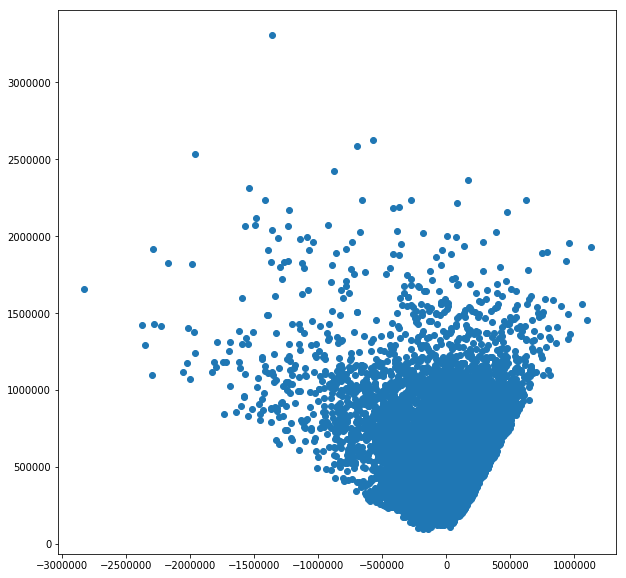

In [626]:
plt.figure(figsize=(10,10))
plt.scatter(residuals, yhat)

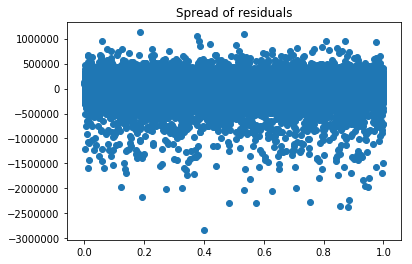

In [862]:
xvals = np.linspace(0, 1, len(residuals))
plt.scatter(xvals, residuals)
plt.title('Spread of residuals')
plt.show()

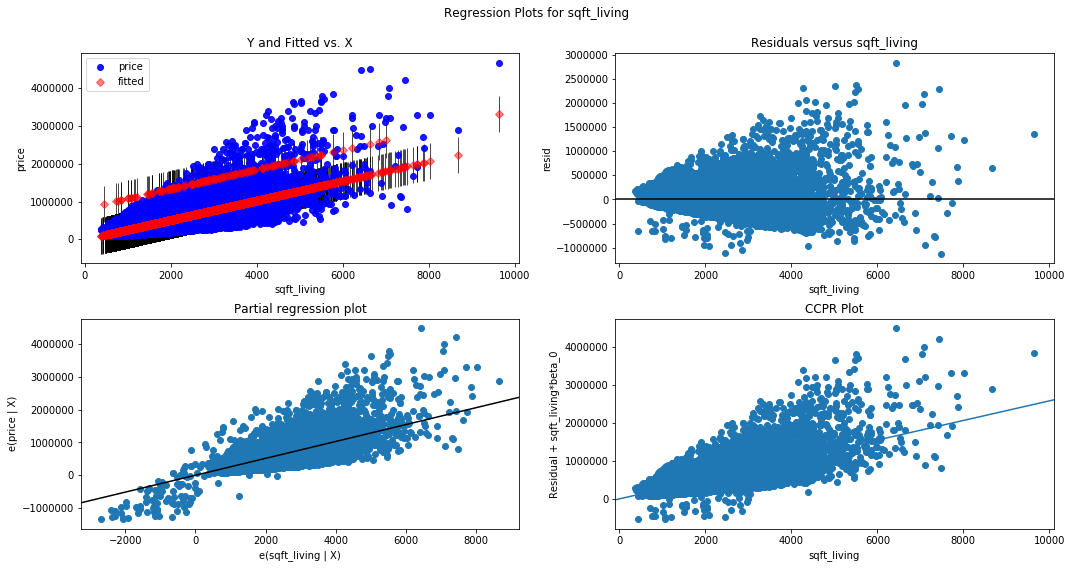

In [554]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1a, 'sqft_living' ,fig=fig)
plt.show()

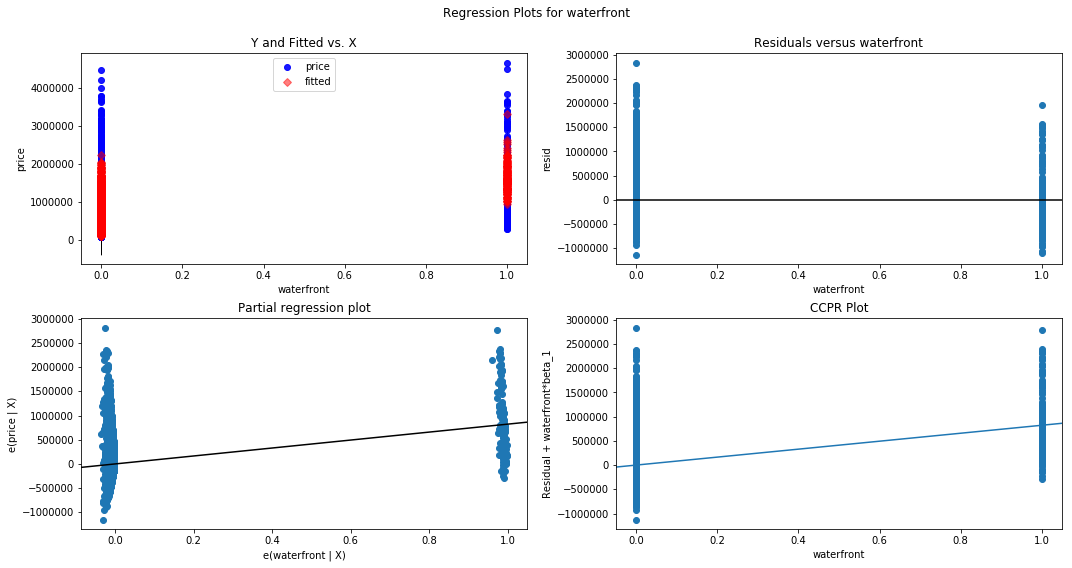

In [555]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1a, 'waterfront' ,fig=fig)
plt.show()

Residuals are heteroscedastic and mostly below 0 so this model is not one that can be used

[Back to Table of Contents](#Table-of-contents)

### Model 1b testing

In [602]:
linregb = LinearRegression(fit_intercept = False)

In [609]:
xb = trimdata[['sqft_living', 'waterfront', 'lat', 'long']]
yb = trimdata['price']
xbtrain, xbtest, ybtrain, ybtest = train_test_split(xb, yb, train_size=0.80)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [610]:
linregb.fit(xbtrain, ybtrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [611]:
linregb.score(xbtrain, ybtrain)

0.571480480402484

In [612]:
linregb.score(xbtest, ybtest)

0.5767517845922427

In [613]:
cross_val_score(linregb, xb, yb, scoring='r2', cv=8)

array([0.59652258, 0.54426454, 0.59522063, 0.5274203 , 0.57663936,
       0.57534472, 0.56170723, 0.57388334])

In [659]:
yhatb = linregb.predict(xb)
residualsb = yhatb - yb

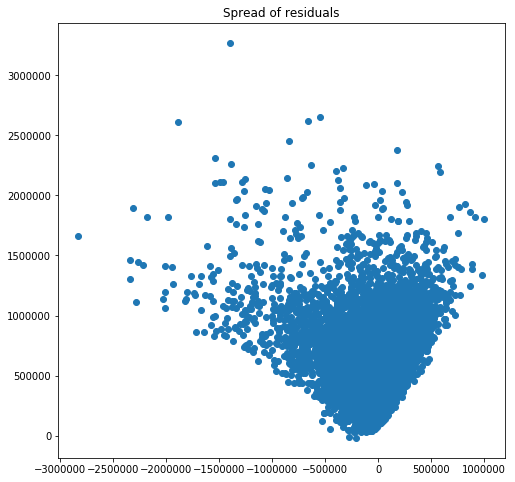

In [863]:
plt.figure(figsize=(8,8))
plt.scatter(residualsb, yhatb)
plt.title('Spread of residuals')
plt.show()

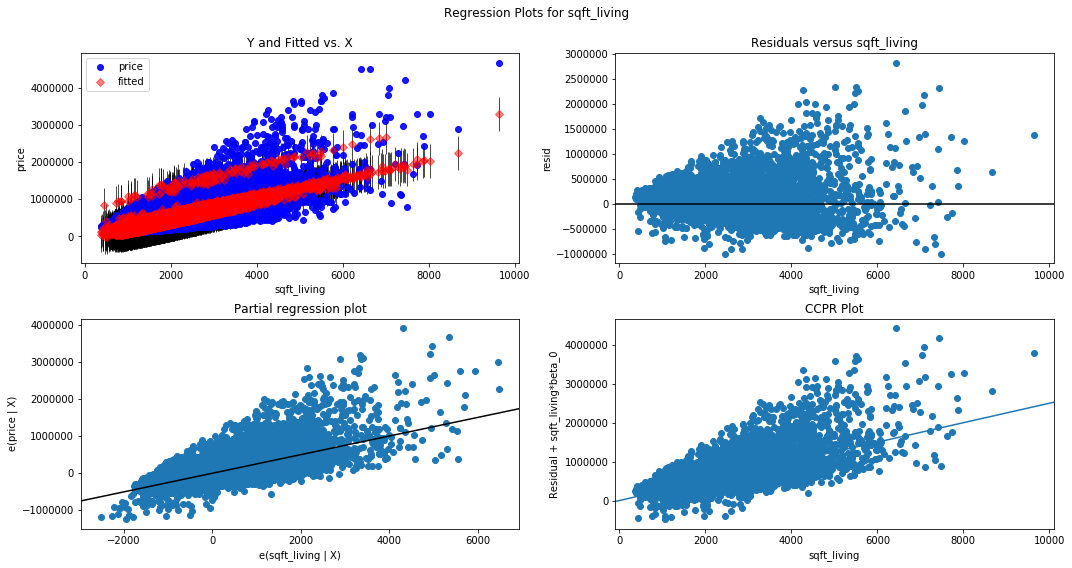

In [572]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1b, 'sqft_living' ,fig=fig)
plt.show()

Again coning with a lot on the positive side this time, so this model will not work as well.  
I will try logging sqft living to see if that helps

In [651]:
trimdata['log_sqft_living'] = np.log(trimdata.sqft_living)

In [ ]:
trimdata['waterfront'] = np.log(trimdata.sqft_living)

In [667]:
linregb1 = LinearRegression(fit_intercept = False)

In [688]:
xb1 = trimdata[['log_sqft_living', 'waterfront']]
yb1 = trimdata['price']
xb1train, xb1test, yb1train, yb1test = train_test_split(xb1, yb1, train_size=0.80)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [689]:
linregb1.fit(xb1train, yb1train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [690]:
linregb1.score(xb1train, yb1train)

0.15934862059123123

In [691]:
linregb1.score(xb1test, yb1test)

0.15783580943978026

In [692]:
yhatb1 = linregb1.predict(xb1)
residualsb1 = yhatb1 - yb1

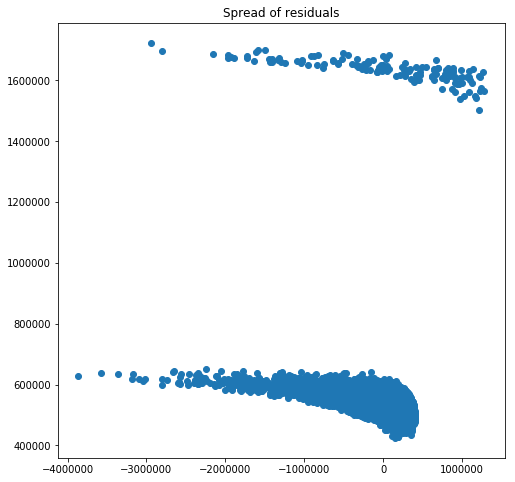

In [864]:
plt.figure(figsize=(8,8))
plt.scatter(residualsb1, yhatb1)
plt.title('Spread of residuals')
plt.show()

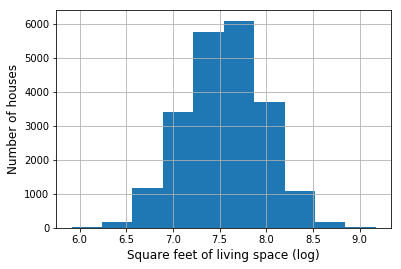

In [865]:
trimdata.log_sqft_living.hist()
plt.xlabel('Square feet of living space (log)')
plt.ylabel('Number of houses')
plt.show()

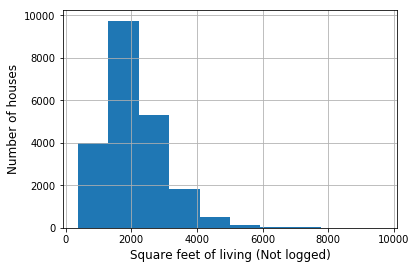

In [866]:
trimdata.sqft_living.hist()
plt.xlabel('Square feet of living (Not logged)')
plt.ylabel('Number of houses')
plt.show()

The logging helped the distrubution but the r2 scores are extremely low and this is not a model I can use

[Back to Table of Contents](#Table-of-contents)

### Model 2a testing

In [593]:
linregc = LinearRegression(fit_intercept = False)

In [627]:
xc = trimdata[['grade', 'waterfront']]
yc = trimdata['price']
xctrain, xctest, yctrain, yctest = train_test_split(xc, yc, train_size=0.80)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [628]:
linregc.fit(xctrain, yctrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [629]:
linregc.score(xctrain, yctrain)

0.4817039459364537

In [630]:
linregc.score(xctest, yctest)

0.5038099852635501

In [635]:
cross_val_score(linregc, xc, yc, scoring='r2', cv=8)

array([0.5056778 , 0.46969571, 0.50287377, 0.44782077, 0.47641502,
       0.49406024, 0.46870192, 0.49247019])

In [631]:
yhatc = linregc.predict(xc)
residualsc = yhatc - yc

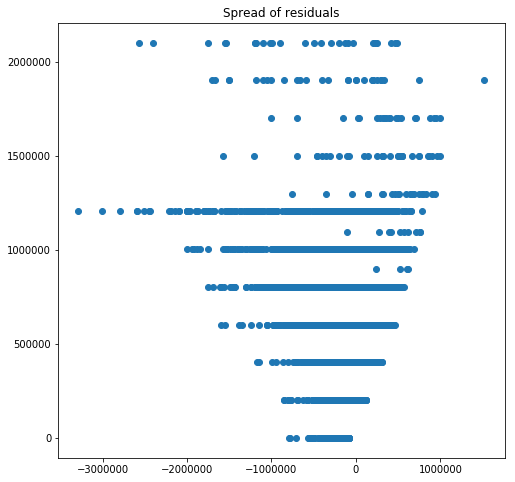

In [867]:
plt.figure(figsize=(8,8))
plt.scatter(residualsc, yhatc)
plt.title('Spread of residuals')
plt.show()

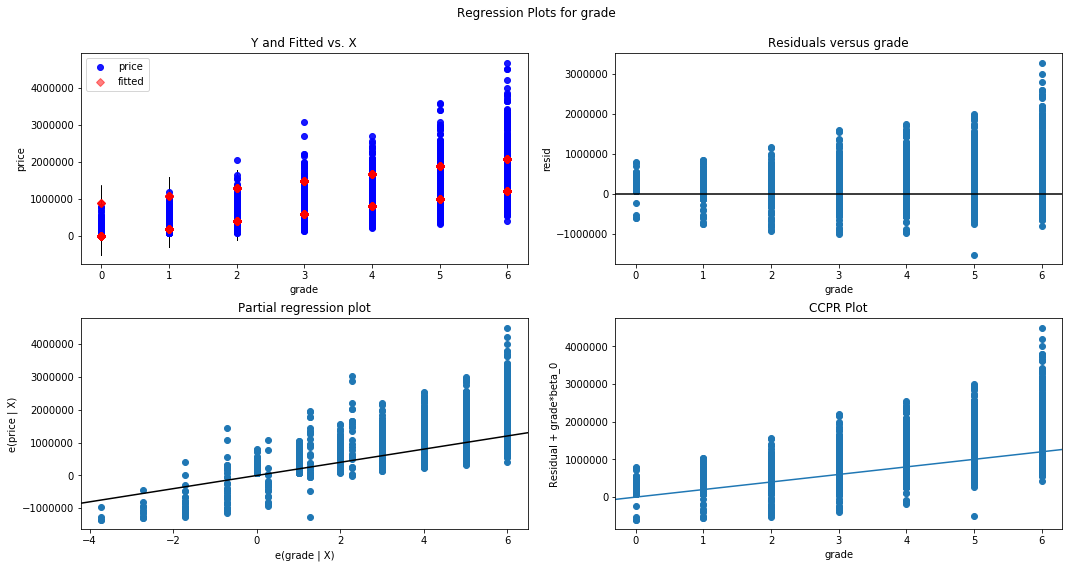

In [634]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2a, 'grade' ,fig=fig)
plt.show()

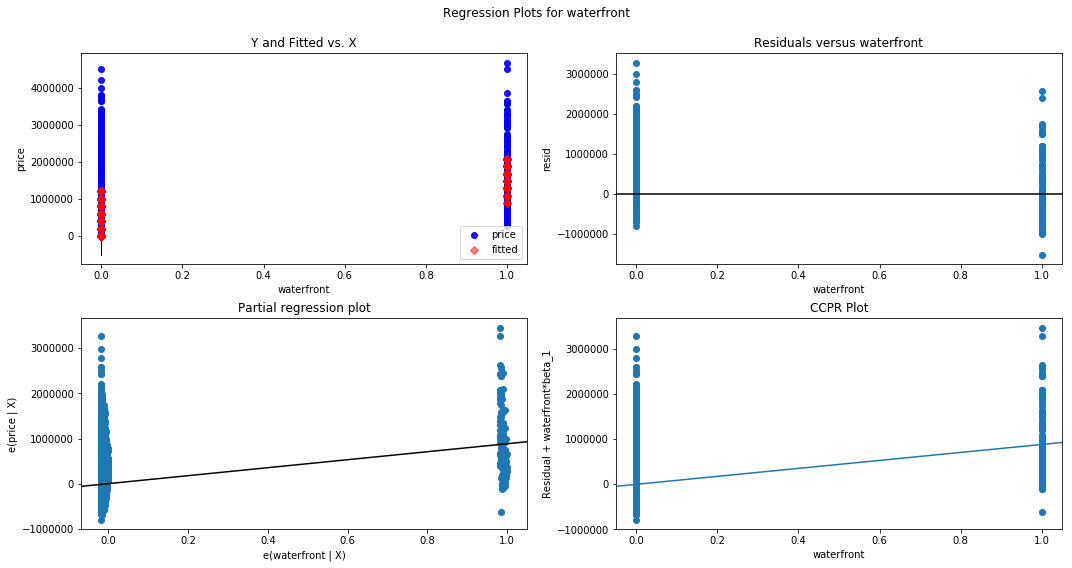

In [636]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2a, 'waterfront' ,fig=fig)
plt.show()

There is coning here in the residuals so I can not use this model

[Back to Table of Contents](#Table-of-contents)

### Model 2b testing

In [637]:
linregd = LinearRegression(fit_intercept = False)

In [702]:
xd = trimdata[['grade']]
yd = trimdata['price']
xdtrain, xdtest, ydtrain, ydtest = train_test_split(xd, yd, train_size=0.80)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [703]:
linregd.fit(xdtrain, ydtrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [704]:
linregd.score(xdtrain, ydtrain)

0.446746520620959

In [705]:
linregd.score(xdtest, ydtest)

0.43772238831805155

In [706]:
cross_val_score(linregd, xd, yd, scoring='r2', cv=8)

array([0.42540297, 0.43824986, 0.4439462 , 0.42215705, 0.44740053,
       0.44205912, 0.45189532, 0.46225161])

In [707]:
yhatd = linregd.predict(xd)
residualsd = yhatd - yd

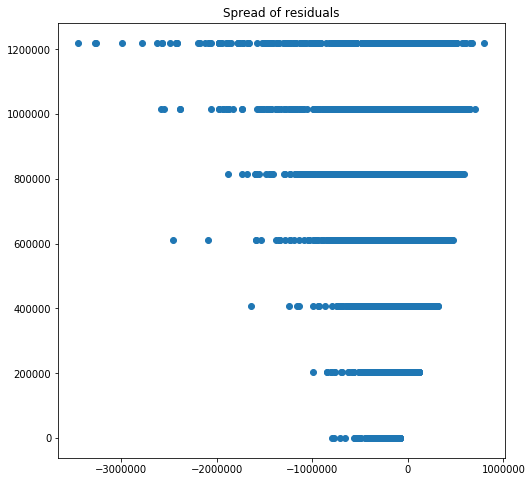

In [868]:
plt.figure(figsize=(8,8))
plt.scatter(residualsd, yhatd)
plt.title('Spread of residuals')
plt.show()

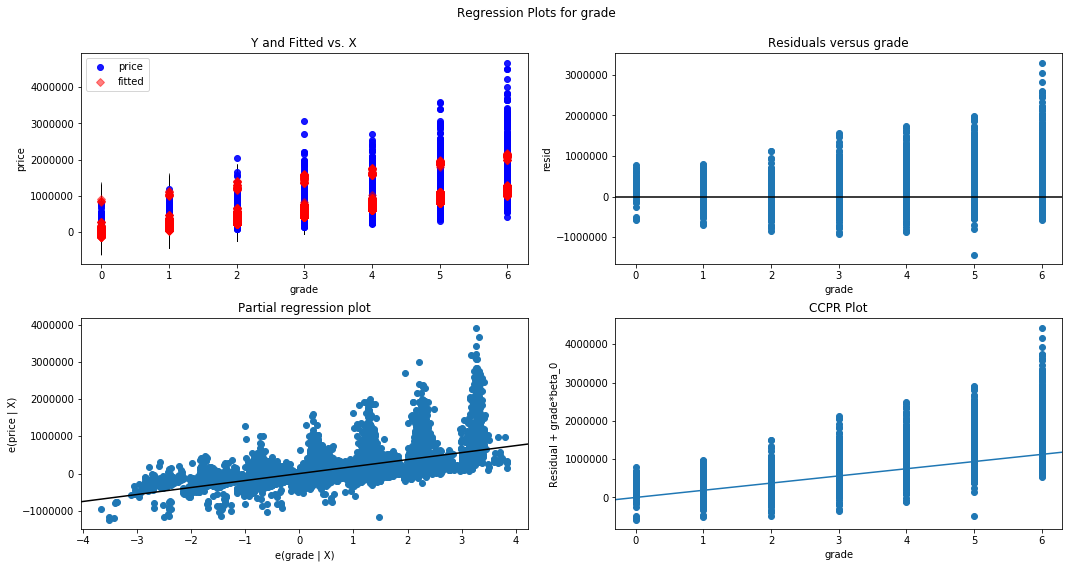

In [709]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2b, 'grade' ,fig=fig)
plt.show()

There is again coning here so I will be unable to use this model either

[Back to Table of Contents](#Table-of-contents)

## Trying to split price into above and under 1 million in 2 models

### Under 1 million dollars

In [710]:
tdata.price.describe()

count     20106.000000
mean     467141.206506
std      195490.596602
min       78000.000000
25%      314000.000000
50%      433347.500000
75%      592287.500000
max      999999.000000
Name: price, dtype: float64

In [712]:
Ldata.price.describe()

count    1.458000e+03
mean     1.539314e+06
std      6.290628e+05
min      1.010000e+06
25%      1.150000e+06
50%      1.330000e+06
75%      1.700000e+06
max      7.700000e+06
Name: price, dtype: float64

In [715]:
tdata.drop(['grade_0','grade_1','grade_2','grade_3','grade_4','grade_5','grade_6'], axis=1, inplace=True)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [716]:
tdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,bed_bath,bath_simp,sqft_simp,month,2015,2014,year,grade,lat,long
price,1.000000,0.287373,0.439713,0.604282,0.269190,0.050019,0.515619,0.218191,0.549269,0.082971,0.445515,0.275169,0.565005,-0.013184,0.002188,-0.002188,0.002188,0.617917,0.440612,0.079539
bedrooms,0.287373,1.000000,0.488130,0.587064,0.152127,-0.028655,0.463725,0.274221,0.369654,0.021612,0.566342,0.273536,0.570318,-0.002688,-0.008582,0.008582,-0.008582,0.312860,-0.035239,0.141927
bathrooms,0.439713,0.488130,1.000000,0.711613,0.502637,-0.009904,0.632872,0.211179,0.521190,0.062639,0.995761,0.572242,0.679468,0.008153,-0.027919,0.027919,-0.027919,0.606224,-0.017537,0.251349
sqft_living,0.604282,0.587064,0.711613,1.000000,0.336301,0.000421,0.849869,0.366288,0.731886,0.171779,0.733859,0.397510,0.922435,0.013334,-0.030328,0.030328,-0.030328,0.693780,-0.000359,0.290858
floors,0.269190,0.152127,0.502637,0.336301,1.000000,-0.007663,0.528095,-0.297568,0.267057,-0.022449,0.490681,0.226342,0.313062,0.012782,-0.021152,0.021152,-0.021152,0.458082,0.032466,0.137578
waterfront,0.050019,-0.028655,-0.009904,0.000421,-0.007663,1.000000,-0.010501,0.020105,0.003668,0.032303,-0.012372,0.002715,0.008193,0.005708,-0.008220,0.008220,-0.008220,-0.013774,-0.041999,-0.056042
sqft_above,0.515619,0.463725,0.632872,0.849869,0.528095,-0.010501,1.000000,-0.170071,0.712183,0.173338,0.646504,0.321896,0.773625,0.010736,-0.024232,0.024232,-0.024232,0.700804,-0.055922,0.393685
sqft_basement,0.218191,0.274221,0.211179,0.366288,-0.297568,0.020105,-0.170071,1.000000,0.112492,0.014437,0.228320,0.172494,0.356274,0.007283,-0.014073,0.014073,-0.014073,0.061009,0.097554,-0.147706
sqft_living15,0.549269,0.369654,0.521190,0.731886,0.267057,0.003668,0.712183,0.112492,1.000000,0.177943,0.531126,0.228398,0.690170,0.006081,-0.024295,0.024295,-0.024295,0.664575,0.010980,0.376676
sqft_lot15,0.082971,0.021612,0.062639,0.171779,-0.022449,0.032303,0.173338,0.014437,0.177943,1.000000,0.061428,0.044181,0.144782,0.006909,-0.004260,0.004260,-0.004260,0.101414,-0.097060,0.246032


In [735]:
modelp1 = sm.OLS(tdata.price, tdata[['grade', 'lat', 'long']]).fit()
modelp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 8.594e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        10:32:27   Log-Likelihood:            -2.6622e+05
No. Observations:               20106   AIC:                         5.324e+05
Df Residuals:                   20103   BIC:                         5.325e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       1.082e+05    966.922    111.915      0.000    1.06e+05     1.1e+05
lat         4.972e+05   6707.405     74.127      0.000    4.84e+05     5.1e+05
long        1.919e+05   2606.814     73.602      0.000    1.87e+05    1.97e+05
==============================================================================
Omnibus:                     1974.438   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2719.767
Skew:                           0.797   Prob(JB):                         0.00
Kurtosis:                       3.842   Cond. No.                         983.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

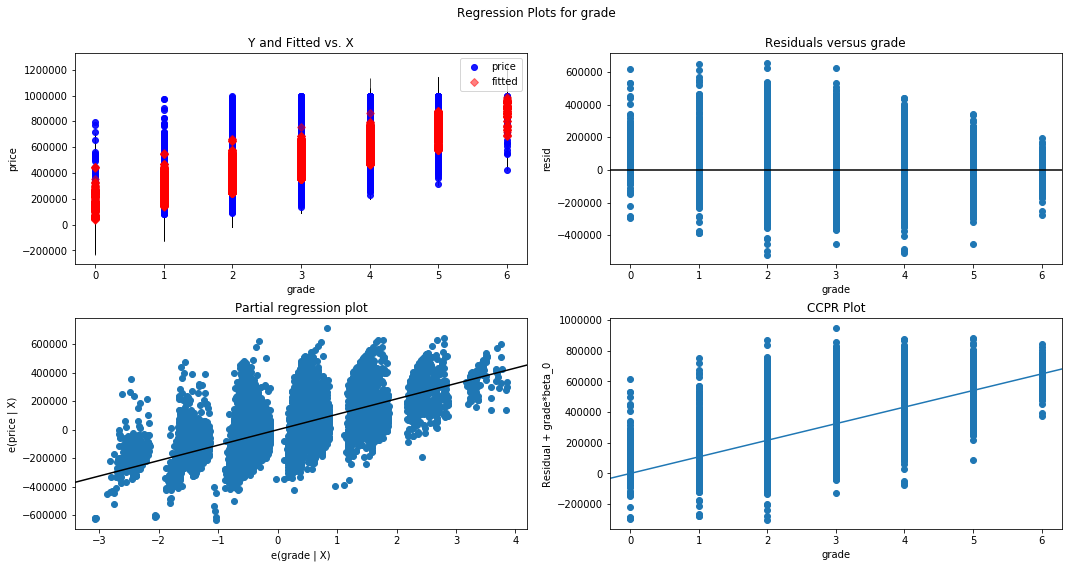

In [718]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp1, 'grade' ,fig=fig)
plt.show()

In [719]:
linregp1 = LinearRegression(fit_intercept = False)

In [720]:
xp1 = tdata[['grade', 'lat', 'long']]
yp1 = tdata['price']
xp1train, xp1test, yp1train, yp1test = train_test_split(xp1, yp1, train_size=0.80)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [721]:
linregp1.fit(xp1train, yp1train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [722]:
linregp1.score(xp1train, yp1train)

0.5134942137742646

In [723]:
linregp1.score(xp1test, yp1test)

0.5188554458262167

In [724]:
cross_val_score(linregp1, xp1, yp1, scoring='r2', cv=8)

array([0.51942417, 0.49709213, 0.51540878, 0.49948693, 0.50572615,
       0.50029188, 0.51130408, 0.55199416])

In [725]:
yhatp1 = linregp1.predict(xp1)
residualsp1 = yhatp1 - yp1

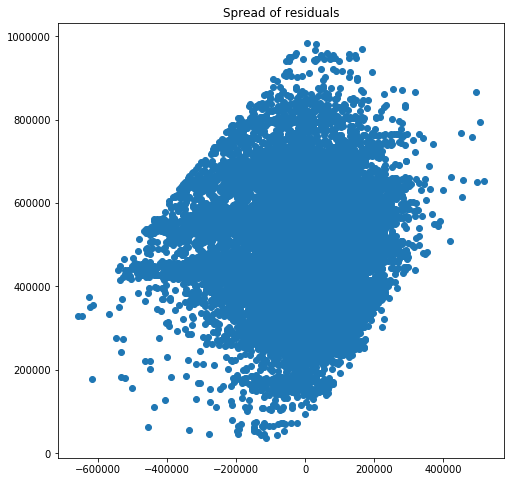

In [869]:
plt.figure(figsize=(8,8))
plt.scatter(residualsp1, yhatp1)
plt.title('Spread of residuals')
plt.show()

In [727]:
yhatp1_train = linregp1.predict(xp1train)
yhatp1_test = linregp1.predict(xp1test)

In [729]:
train_msep1 = mean_squared_error(yp1train, yhatp1_train)
test_msep1 = mean_squared_error(yp1test, yhatp1_test)
print('Train Mean Squarred Error:', train_msep1)
print('Test Mean Squarred Error:', test_msep1)

Train Mean Squarred Error: 18583623815.29162
Test Mean Squarred Error: 18411253105.79441


In [743]:
print (np.sqrt(train_msep1))
print (np.sqrt(test_msep1))

136321.76574300826
135688.07282069567


[Back to Table of Contents](#Table-of-contents)

## Under 1 million dollars Final Model

I will log sqft living as that did seem to help earlier as well

In [744]:
tdata['log_sqft_living'] = np.log(tdata.sqft_living)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [745]:
tdata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,bath_simp,sqft_simp,month,2015,2014,year,grade,lat,long,log_sqft_living
price,1.000000,0.287373,0.439713,0.604282,0.269190,0.050019,0.515619,0.218191,0.549269,0.082971,...,0.275169,0.565005,-0.013184,0.002188,-0.002188,0.002188,0.617917,0.440612,0.079539,0.586480
bedrooms,0.287373,1.000000,0.488130,0.587064,0.152127,-0.028655,0.463725,0.274221,0.369654,0.021612,...,0.273536,0.570318,-0.002688,-0.008582,0.008582,-0.008582,0.312860,-0.035239,0.141927,0.614605
bathrooms,0.439713,0.488130,1.000000,0.711613,0.502637,-0.009904,0.632872,0.211179,0.521190,0.062639,...,0.572242,0.679468,0.008153,-0.027919,0.027919,-0.027919,0.606224,-0.017537,0.251349,0.726955
sqft_living,0.604282,0.587064,0.711613,1.000000,0.336301,0.000421,0.849869,0.366288,0.731886,0.171779,...,0.397510,0.922435,0.013334,-0.030328,0.030328,-0.030328,0.693780,-0.000359,0.290858,0.968931
floors,0.269190,0.152127,0.502637,0.336301,1.000000,-0.007663,0.528095,-0.297568,0.267057,-0.022449,...,0.226342,0.313062,0.012782,-0.021152,0.021152,-0.021152,0.458082,0.032466,0.137578,0.341284
waterfront,0.050019,-0.028655,-0.009904,0.000421,-0.007663,1.000000,-0.010501,0.020105,0.003668,0.032303,...,0.002715,0.008193,0.005708,-0.008220,0.008220,-0.008220,-0.013774,-0.041999,-0.056042,-0.002101
sqft_above,0.515619,0.463725,0.632872,0.849869,0.528095,-0.010501,1.000000,-0.170071,0.712183,0.173338,...,0.321896,0.773625,0.010736,-0.024232,0.024232,-0.024232,0.700804,-0.055922,0.393685,0.814061
sqft_basement,0.218191,0.274221,0.211179,0.366288,-0.297568,0.020105,-0.170071,1.000000,0.112492,0.014437,...,0.172494,0.356274,0.007283,-0.014073,0.014073,-0.014073,0.061009,0.097554,-0.147706,0.371573
sqft_living15,0.549269,0.369654,0.521190,0.731886,0.267057,0.003668,0.712183,0.112492,1.000000,0.177943,...,0.228398,0.690170,0.006081,-0.024295,0.024295,-0.024295,0.664575,0.010980,0.376676,0.707893
sqft_lot15,0.082971,0.021612,0.062639,0.171779,-0.022449,0.032303,0.173338,0.014437,0.177943,1.000000,...,0.044181,0.144782,0.006909,-0.004260,0.004260,-0.004260,0.101414,-0.097060,0.246032,0.151348


In [746]:
modelp1a = sm.OLS(tdata.price, tdata[['log_sqft_living', 'lat', 'long']]).fit()
modelp1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 8.355e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        10:42:30   Log-Likelihood:            -2.6648e+05
No. Observations:               20106   AIC:                         5.330e+05
Df Residuals:                   20103   BIC:                         5.330e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
log_sqft_living   2.68e+05   2479.514    108.089      0.000    2.63e+05    2.73e+05
lat              5.413e+05   6743.021     80.281      0.000    5.28e+05    5.55e+05
long             2.233e+05   2611.636     85.493      0.000    2.18e+05    2.28e+05
==============================================================================
Omnibus:                     1479.803   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1852.026
Skew:                           0.692   Prob(JB):                         0.00
Kurtosis:                       3.544   Cond. No.                         976.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

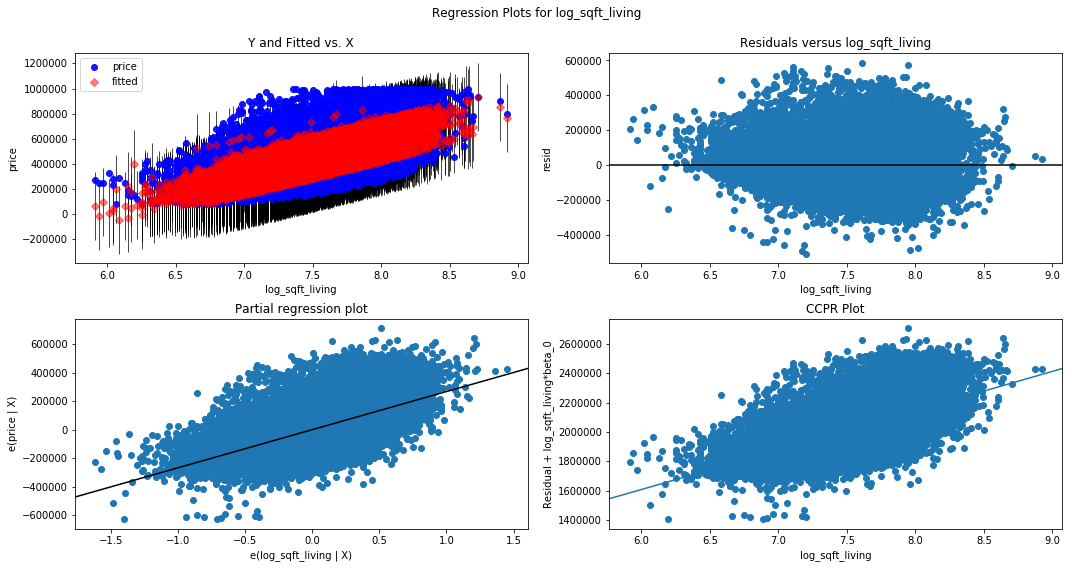

In [747]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp1a, 'log_sqft_living' ,fig=fig)
plt.show()

In [748]:
linregp1a = LinearRegression(fit_intercept = False)

In [749]:
xp1a = tdata[['log_sqft_living', 'lat', 'long']]
yp1a = tdata['price']
xp1atrain, xp1atest, yp1atrain, yp1atest = train_test_split(xp1a, yp1a, train_size=0.80)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [750]:
linregp1a.fit(xp1atrain, yp1atrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [751]:
linregp1a.score(xp1atrain, yp1atrain)

0.503074040072266

In [752]:
linregp1a.score(xp1atest, yp1atest)

0.49622495027944596

In [753]:
cross_val_score(linregp1a, xp1a, yp1a, scoring='r2', cv=8)

array([0.50272645, 0.48011162, 0.4972013 , 0.4884102 , 0.49342615,
       0.49041978, 0.50702229, 0.54091186])

In [754]:
yhatp1a = linregp1a.predict(xp1a)
residualsp1a = yhatp1a - yp1a

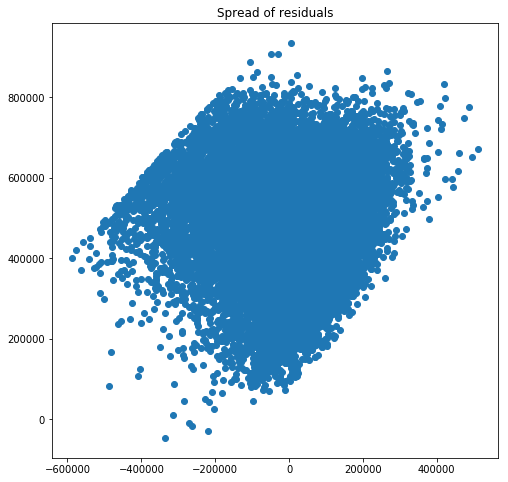

In [870]:
plt.figure(figsize=(8,8))
plt.scatter(residualsp1a, yhatp1a)
plt.title('Spread of residuals')
plt.show()

In [756]:
yhatp1a_train = linregp1a.predict(xp1atrain)
yhatp1a_test = linregp1a.predict(xp1atest)

In [758]:
train_msep1a = mean_squared_error(yp1atrain, yhatp1a_train)
test_msep1a = mean_squared_error(yp1atest, yhatp1a_test)
print('Train Mean Squarred Error:', train_msep1a)
print('Test Mean Squarred Error:', test_msep1a)

Train Mean Squarred Error: 19044829298.333225
Test Mean Squarred Error: 19020680241.930405


In [759]:
print (np.sqrt(train_msep1a))
print (np.sqrt(test_msep1a))

138003.00467139555
137915.48224159027


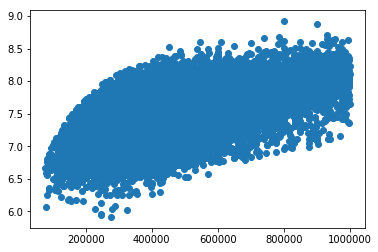

In [771]:
plt.scatter(tdata.price, tdata.log_sqft_living);

In [945]:
corr1 = tdata[['log_sqft_living', 'lat', 'long']].corr()

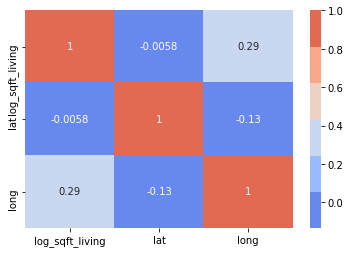

In [946]:
sns.heatmap(corr1, fmt='0.2g', annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

$$p = 268000  sqftliving(log) + 541300  lat + 223300 long$$

Good R2 scores, and mean squared error numbers are pretty close.  
Residuals also look very good for this. 
Low correlation scores between the features in the model, though long and log_sqft_living are close to .30.
This seems to be a good model for predicting prices of homes under 1 million dollars.

[Back to Table of Contents](#Table-of-contents)

## Over 1 million dollars model

In [730]:
Ldata.drop(['grade_0','grade_1','grade_2','grade_3','grade_4','grade_5','grade_6'], axis=1, inplace=True)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [921]:
Ldata.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,bath_simp,sqft_simp,month,2015,2014,year,grade,lat,long,log_sqft_living
price,1.000000,0.154518,0.388057,0.517679,0.072451,0.314815,0.396240,0.228170,0.244485,0.028610,...,0.248387,0.180991,-0.003480,0.021328,-0.021328,0.021328,0.347345,0.011106,-0.045178,0.479848
bedrooms,0.154518,1.000000,0.427966,0.399279,0.125717,-0.137382,0.302880,0.184291,0.134246,0.010169,...,0.325096,0.280752,0.036217,-0.035368,0.035368,-0.035368,0.146196,-0.000256,0.091376,0.411871
bathrooms,0.388057,0.427966,1.000000,0.704064,0.277223,-0.023732,0.607734,0.194247,0.251076,0.170804,...,0.766103,0.384546,0.032217,-0.040528,0.040528,-0.040528,0.508791,-0.061113,0.254882,0.698522
sqft_living,0.517679,0.399279,0.704064,1.000000,0.226304,0.013354,0.815465,0.353010,0.464841,0.263803,...,0.512965,0.472653,0.050738,-0.071970,0.071970,-0.071970,0.613099,-0.122431,0.363917,0.971528
floors,0.072451,0.125717,0.277223,0.226304,1.000000,-0.032902,0.435135,-0.310323,-0.046830,0.015751,...,0.285051,0.143673,0.061362,-0.055309,0.055309,-0.055309,0.288106,0.024926,0.004949,0.236214
waterfront,0.314815,-0.137382,-0.023732,0.013354,-0.032902,1.000000,-0.034440,0.077891,-0.005530,0.010393,...,-0.058728,-0.050684,0.028316,-0.000855,0.000855,-0.000855,-0.033326,-0.109697,-0.015554,-0.007521
sqft_above,0.396240,0.302880,0.607734,0.815465,0.435135,-0.034440,1.000000,-0.242431,0.426916,0.310036,...,0.454869,0.359329,0.041853,-0.052699,0.052699,-0.052699,0.633213,-0.103881,0.460036,0.797950
sqft_basement,0.228170,0.184291,0.194247,0.353010,-0.310323,0.077891,-0.242431,1.000000,0.096983,-0.059710,...,0.118812,0.209565,0.016251,-0.028375,0.028375,-0.028375,0.004422,-0.040760,-0.123769,0.335131
sqft_living15,0.244485,0.134246,0.251076,0.464841,-0.046830,-0.005530,0.426916,0.096983,1.000000,0.180488,...,0.186155,0.209201,0.002426,-0.033724,0.033724,-0.033724,0.455723,-0.226374,0.469279,0.470108
sqft_lot15,0.028610,0.010169,0.170804,0.263803,0.015751,0.010393,0.310036,-0.059710,0.180488,1.000000,...,0.089285,0.066395,-0.030276,0.042523,-0.042523,0.042523,0.166104,-0.061674,0.427778,0.237189


In [734]:
modelp2 = sm.OLS(Ldata.price, Ldata[['sqft_living', 'waterfront']]).fit()
modelp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     7362.
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        10:32:21   Log-Likelihood:                -21198.
No. Observations:                1458   AIC:                         4.240e+04
Df Residuals:                    1456   BIC:                         4.241e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   382.7427      3.389    112.932      0.000     376.095     389.391
waterfront   7.646e+05   5.26e+04     14.524      0.000    6.61e+05    8.68e+05
==============================================================================
Omnibus:                      203.799   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              935.627
Skew:                           0.579   Prob(JB):                    6.78e-204
Kurtosis:                       6.749   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

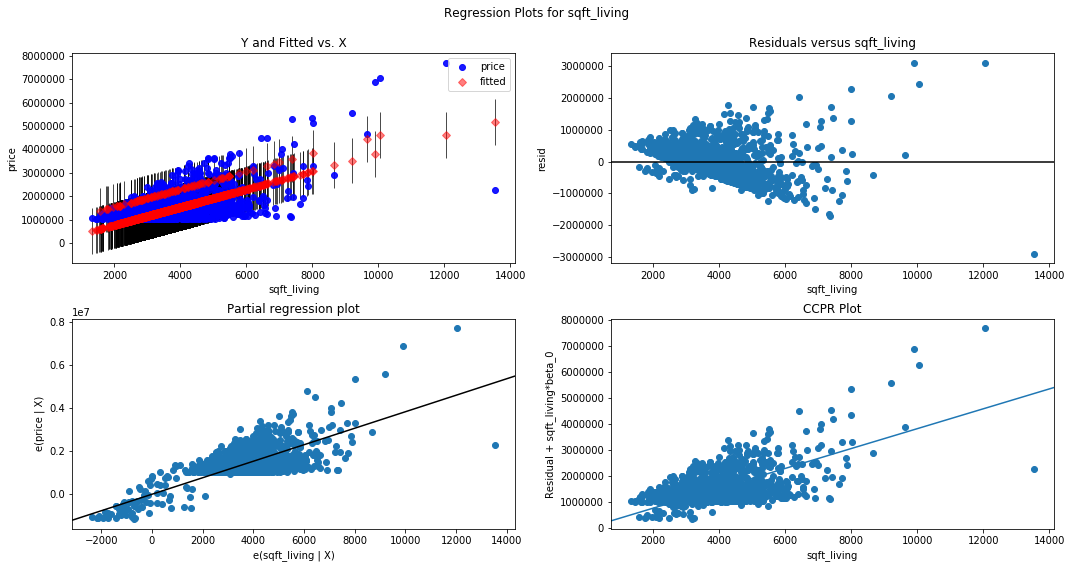

In [736]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp2, 'sqft_living' ,fig=fig)
plt.show()

In [737]:
Ldata['log_sqft_living'] = np.log(Ldata.sqft_living)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [775]:
modelp2a = sm.OLS(Ldata.price, Ldata[['log_sqft_living', 'waterfront']]).fit()
modelp2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     5415.
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        11:10:18   Log-Likelihood:                -21399.
No. Observations:                1458   AIC:                         4.280e+04
Df Residuals:                    1456   BIC:                         4.281e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
log_sqft_living  1.828e+05   1891.788     96.605      0.000    1.79e+05    1.86e+05
waterfront       7.633e+05   6.05e+04     12.619      0.000    6.45e+05    8.82e+05
==============================================================================
Omnibus:                     1098.574   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27411.240
Skew:                           3.271   Prob(JB):                         0.00
Kurtosis:                      23.209   Cond. No.                         33.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

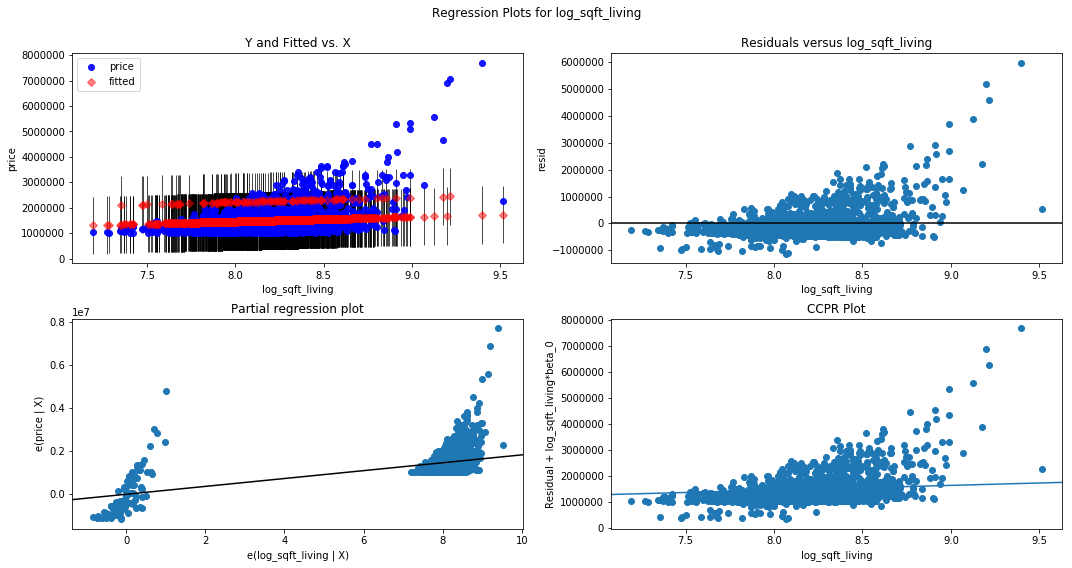

In [776]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp2a, 'log_sqft_living' ,fig=fig)
plt.show()

In [769]:
Ldata.loc[Ldata['price'] > 6000000]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,sqft_simp,date,month,2015,2014,year,grade,lat,long,log_sqft_living
3910,7060000.0,5,4.50,10040,2.0,1.0,7680,2360.0,3930,25449,...,3,2014-06-11,6,0,1,2014,6,47.6500,-122.214,9.214332
7245,7700000.0,6,8.00,12050,2.5,0.0,8570,3480.0,3940,8800,...,3,2014-10-13,10,0,1,2014,6,47.6298,-122.323,9.396820
9245,6890000.0,6,7.75,9890,2.0,0.0,8860,1030.0,4540,42730,...,3,2014-09-19,9,0,1,2014,6,47.6305,-122.240,9.199279


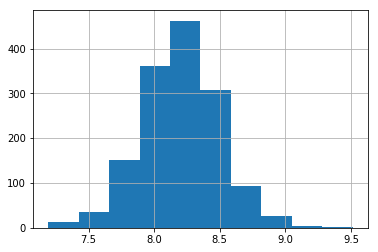

In [741]:
Ldata.log_sqft_living.hist()

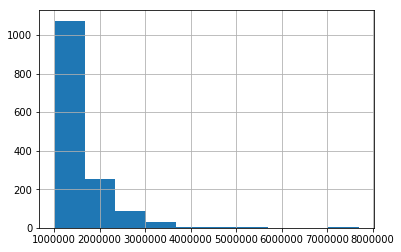

In [742]:
Ldata.price.hist()

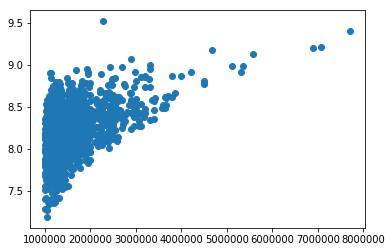

In [762]:
plt.scatter(Ldata.price, Ldata.log_sqft_living)

In [769]:
Ldata.loc[Ldata['price'] > 6000000]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,sqft_simp,date,month,2015,2014,year,grade,lat,long,log_sqft_living
3910,7060000.0,5,4.50,10040,2.0,1.0,7680,2360.0,3930,25449,...,3,2014-06-11,6,0,1,2014,6,47.6500,-122.214,9.214332
7245,7700000.0,6,8.00,12050,2.5,0.0,8570,3480.0,3940,8800,...,3,2014-10-13,10,0,1,2014,6,47.6298,-122.323,9.396820
9245,6890000.0,6,7.75,9890,2.0,0.0,8860,1030.0,4540,42730,...,3,2014-09-19,9,0,1,2014,6,47.6305,-122.240,9.199279


In [800]:
Ldata = Ldata.drop([3910,7245,9245])

In [801]:
Ldata.loc[Ldata['price'] > 6000000]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,sqft_simp,date,month,2015,2014,year,grade,lat,long,log_sqft_living


[Back to Table of Contents](#Table-of-contents)

## Over 1 Million dollars Final Model

In [954]:
modelp2b = sm.OLS(Ldata.price, Ldata[['log_sqft_living', 'waterfront']]).fit()
modelp2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     6432.
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:01:29   Log-Likelihood:                -21214.
No. Observations:                1455   AIC:                         4.243e+04
Df Residuals:                    1453   BIC:                         4.244e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
log_sqft_living  1.816e+05   1719.647    105.583      0.000    1.78e+05    1.85e+05
waterfront       7.245e+05   5.52e+04     13.125      0.000    6.16e+05    8.33e+05
==============================================================================
Omnibus:                      726.487   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5126.869
Skew:                           2.236   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

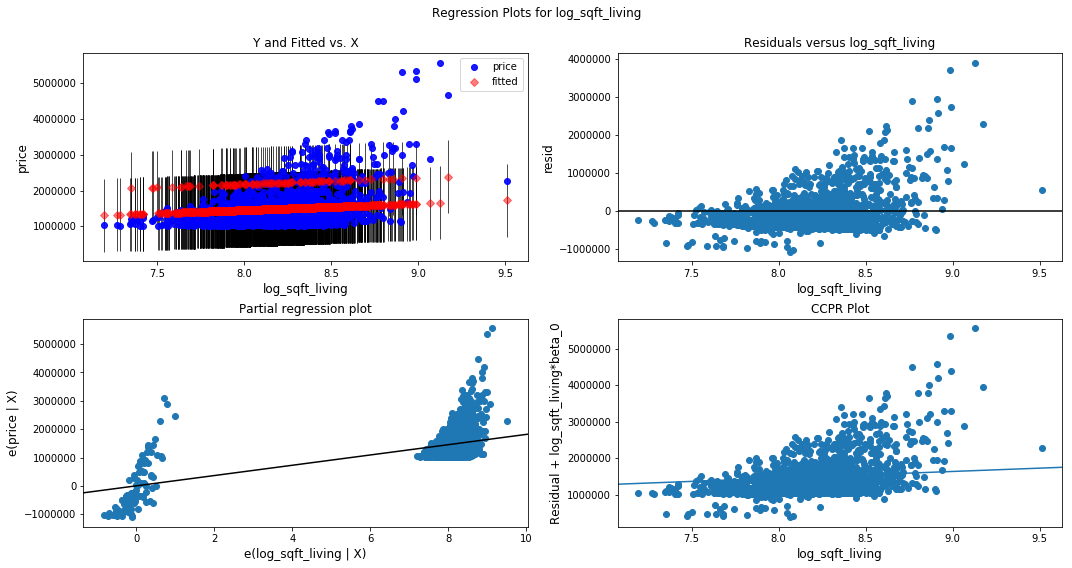

In [881]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp2b, 'log_sqft_living' ,fig=fig)
plt.show()

In [882]:
linregp2b = LinearRegression(fit_intercept = False)

In [934]:
xp2b = Ldata[['log_sqft_living', 'waterfront']]
yp2b = Ldata['price']
xp2btrain, xp2btest, yp2btrain, yp2btest = train_test_split(xp2b, yp2b, train_size=0.80)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [935]:
linregp2b.fit(xp2btrain, yp2btrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [936]:
linregp2b.score(xp2btrain, yp2btrain)

0.1786948329761382

In [937]:
linregp2b.score(xp2btest, yp2btest)

0.17925710827380514

In [938]:
cross_val_score(linregp2b, xp2b, yp2b, scoring='r2', cv=8)

array([0.25345269, 0.09054244, 0.21981137, 0.15659371, 0.16602294,
       0.10552739, 0.10134944, 0.15127405])

R2 scores and cross validation scores are not good at all.

In [939]:
yhatp2b = linregp2b.predict(xp2b)
residualsp2b = yhatp2b - yp2b

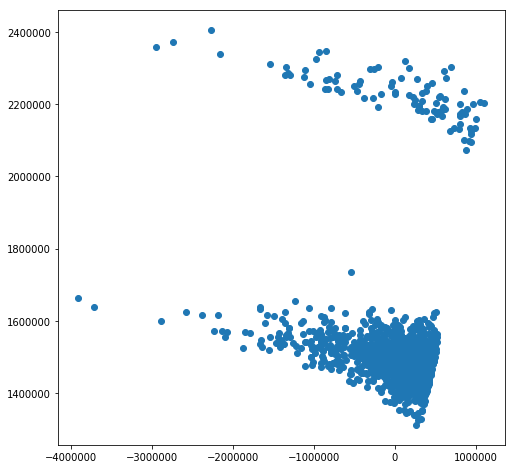

In [940]:
plt.figure(figsize=(8,8))
plt.scatter(residualsp2b, yhatp2b)

In [941]:
yhatp2b_train = linregp2b.predict(xp2btrain)
yhatp2b_test = linregp2b.predict(xp2btest)

In [942]:
train_msep2b = mean_squared_error(yp2btrain, yhatp2b_train)
test_msep2b = mean_squared_error(yp2btest, yhatp2b_test)
print('Train Mean Squarred Error:', train_msep2b)
print('Test Mean Squarred Error:', test_msep2b)

Train Mean Squarred Error: 281736564810.0563
Test Mean Squarred Error: 224626523661.91464


In [943]:
print (np.sqrt(train_msep2b))
print (np.sqrt(test_msep2b))

530788.6253585849
473947.8068964078


In [948]:
corr2 = Ldata[['log_sqft_living', 'waterfront']].corr()

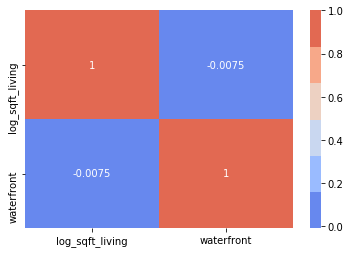

In [949]:
sns.heatmap(corr2, fmt='0.2g', annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

$$p = 181600  sqftliving(log) + 724500  waterfront$$

Bad R2 scores and mean squared errors are far apart.  
My conclusion for higher value homes is that as we saw earlier there are clearly different factors affecting these homes then lower value homes.  
I am not able to make good predictions for higher value homes from this model.  
I think there are outside factors affecting the prices of these homes, which are possibly different then the features which are here.
I would recommend getting more information about other factors to be able to properly figure out what is affecting these higher value home prices.  
This is due to the fact that there does not seem to be another good indicator besides waterfront available that seems to drive higher value home prices

[Back to Table of Contents](#Table-of-contents)

# Explaining three features used in modeling 

1. log_sqft_living - This seems to be the best indicator, based on the modeling done. The living space of the house ends up affecting and therefore being highly correlated with almost all other factors also correlated with the price  
2. Waterfront - Seems to affect higher value homes, and also seems to be smaller then other homes as well, so the correlation with the living space is not high and therefore I tried to use it as an indicator for higher value homes.
3. Lat and long - The location of the homes seems to be making a difference here, though that was mainly for lower value homes

[Back to Table of Contents](#Table-of-contents)

# Recommendations

1. Condition rating:   
a. For a buyer that wants a cheap house, should checkout houses with all ratings as there seem to be cheaper houses with all types of ratings.  
b. For a buyer that wants to buy a expensive house, I would say to checkout ratings of 3 and above but in that category a higher rating does not indicate a higher price. However for such a buyer checking out houses with a 1 or 2 rating would not be something that I would recommend as they are usually cheaper  
2. Grade:  In general, the higher the grade, the higher the average price, though you can find houses with good grades for lower prices as well
3. Waterfront:  If a buyer wants a waterfront property, should expect to pay more for it.  
4. Bathrooms: If a buyer want more then 2.75 bathrooms then expect to pay in the upper hundreds of thousands and up.  
5. Sqft of living space: If a buyer wants a big house then you can get one for under 1 million dollars, though in the upper hundreds of thousands. Though other prefernces would also need to be checked into, unless size is the only factor for the buyer.  
6. Over and under 1 million dollar homes: If you want a house on the waterfront then it will probably be more expensive. Also if you want a house over 1 mil then it seems there are other factors to take into account which will affect how much you pay and I have not been able to zero in on all of them. However grade is not as much of a factor as the living size or how many bathrooms there are.   
If you want a house under 1 mil then certain other factors, such as how many bedrooms there are and especially the grade of the house will make a bigger difference.

[Back to Table of Contents](#Table-of-contents)

# Conclusion

I have a good model for under 1 million dollar value homes, but the model for over 1 million dollars does not seem to be such a good model.  
Throughout the analysis of the data included here, there was a clear trend of there being a difference between the indicators that affect lower and higher value homes.
However, I feel that I was unable to zero in on everything that does so.
This leads me to conclude that there are other factors which are not listed here that are affecting the housing prices.  

I would suggest that more data be collected in order to be able to build a proper predictor model for all home value prices, that could work for both higher and lower value homes.

[Back to Table of Contents](#Table-of-contents)